In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienia wyświetlania
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


 1. Struktura danych
 Czy dane zostały poprawnie wczytane (sprawdzenie .head() i .info())?
 Ile jest kolumn i wierszy?
 Jakie są typy danych (int, float, object, datetime)?

In [2]:

# Wczytanie danych z beneficiary
train_provider = pd.read_csv('Train-1542865627584.csv')

# sprawdzenie head
train_provider.head()

Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No

In [3]:
# sprawdzenie info
train_provider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


Widać że PotentialFraud ma wartości tylko Yes/No to flaga klasyfikacji ("Yes" / "No"), więc idealnie powinna być bool lub category.

In [4]:
# Konwersja na flagę binarną
train_provider['FraudFlag'] = train_provider['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Sprawdź typy
print(train_provider.dtypes)

Provider          object
PotentialFraud    object
FraudFlag          int64
dtype: object


In [5]:
train_provider['PotentialFraud'] = train_provider['PotentialFraud'].astype('category')
train_provider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Provider        5410 non-null   object  
 1   PotentialFraud  5410 non-null   category
 2   FraudFlag       5410 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 90.1+ KB


In [6]:
train_provider.shape

(5410, 3)

In [7]:
rows, cols = train_provider.shape
print(f"Liczba wierszy: {rows}")
print(f"Liczba kolumn: {cols}")

Liczba wierszy: 5410
Liczba kolumn: 3


In [8]:
# Wczytanie danych z beneficiary
train_beneficiary = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')

# sprawdzenie head
train_beneficiary.head()

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      2   
2     590                   12                   12                      1   
3     270                   12                   12                      1   
4     680                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         2                          2                   2   
2                         2                          2                   2   
3                         1                          2                   2   
4                         2                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       2                     2   
2                           2                       2                     2   
3                           2                       2                     1   
4                           1                       2                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          2                         2   
2                          1                         2   
3                          1                         1   
4                          2                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                2                   2   
2                                2                   2   
3                                1                   2   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  
0                     70  
1                     50  
2                     40  
3                    760  
4                   1200

In [9]:
train_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [10]:
#DOB i DOD powinny być datetime

In [11]:
train_beneficiary.shape

(138556, 25)

In [12]:
train_beneficiary['RenalDiseaseIndicator'].value_counts()

RenalDiseaseIndicator
0    118978
Y     19578
Name: count, dtype: int64

In [13]:
#renalDiseaseIndicator albo nie mamy danych wtedy 0 albo jest ktoś chory

Ile osób  > 65 ma renalDiseaseIdicator

In [14]:
#Ile osób  > 65 ma renalDiseaseIndicator na true

# Zamiana DOB na datetime
train_beneficiary['DOB'] = pd.to_datetime(train_beneficiary['DOB'], errors='coerce')

# Data odniesienia: koniec 2009 roku
reference_date = pd.to_datetime('2009-12-31')

# Obliczenie wieku
train_beneficiary['Age'] = ((reference_date - train_beneficiary['DOB']).dt.days // 365)

# 🧮 Licznik: osoby > 65 z chorobą nerek
renal_over_65 = train_beneficiary[
    (train_beneficiary['Age'] > 65) &
    (train_beneficiary['RenalDiseaseIndicator'] == 'Y')
]

# 🧮 Mianownik: wszystkie osoby > 65 lat
over_65 = train_beneficiary[train_beneficiary['Age'] > 65]

# ✅ Wyniki
print("Liczba osób >65 z chorobą nerek:", len(renal_over_65))
print("Liczba wszystkich osób >65:", len(over_65))

# 🔢 Procent:
percent = len(renal_over_65) / len(over_65) * 100
print(f"Procent osób > 65 z chorobą nerek: {percent:.2f}%")

Liczba osób >65 z chorobą nerek: 16219
Liczba wszystkich osób >65: 115881
Procent osób > 65 z chorobą nerek: 14.00%


In [15]:
#Ile osób poniżej < 65 ma renalDisease

# 🧮 Licznik: osoby < 65 z chorobą nerek
renal_under_65 = train_beneficiary[
    (train_beneficiary['Age'] < 65) &
    (train_beneficiary['RenalDiseaseIndicator'] == 'Y')
]

# 🧮 Mianownik: wszystkie osoby < 65 lat
under_65 = train_beneficiary[train_beneficiary['Age'] < 65]

# ✅ Wyniki
print("Liczba osób < 65 z chorobą nerek:", len(renal_under_65))
print("Liczba wszystkich osób < 65:", len(under_65))

# 🔢 Procent:
percent_under = len(renal_under_65) / len(under_65) * 100
print(f"Procent osób < 65 z chorobą nerek: {percent_under:.2f}%")


Liczba osób < 65 z chorobą nerek: 3199
Liczba wszystkich osób < 65: 21607
Procent osób < 65 z chorobą nerek: 14.81%


In [16]:
#Czyli ok 14% ma wszystkich objetych ubezpieczeniem renalDisease

In [17]:
#Ile tych co ma renal disease ma chronicKidney

# Filtrowanie: osoby z chorobą nerek i z chroniczną chorobą nerek
renal_and_ckd = train_beneficiary[
    (train_beneficiary['RenalDiseaseIndicator'] == 'Y') &
    (train_beneficiary['ChronicCond_KidneyDisease'] == 1)
]

# Liczba osób z obiema cechami
print("Liczba osób z RenalDiseaseIndicator == 'Y' i ChronicKidney == 1:", len(renal_and_ckd))

# Wszystkie osoby z RenalDiseaseIndicator == 'Y'
renal_all = train_beneficiary[train_beneficiary['RenalDiseaseIndicator'] == 'Y']

# Procent tych, którzy mają również chronic kidney disease
percent_ckd = len(renal_and_ckd) / len(renal_all) * 100

print(f"Procent osób z chorobą nerek, które mają też chronic kidney disease: {percent_ckd:.2f}%")



Liczba osób z RenalDiseaseIndicator == 'Y' i ChronicKidney == 1: 15511
Procent osób z chorobą nerek, które mają też chronic kidney disease: 79.23%


In [18]:
# 79% tylko więc nie możemy zastąpić jedna kolumnę drugą chociaż widać zależności

In [19]:
train_beneficiary.head()

BeneID        DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01  NaN       1     1                     0     39   
1  BENE11002 1936-09-01  NaN       2     1                     0     39   
2  BENE11003 1936-08-01  NaN       1     1                     0     52   
3  BENE11004 1922-07-01  NaN       1     1                     0     39   
4  BENE11005 1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      2   
2     590                   12                   12                      1   
3     270                   12                   12                      1   
4     680                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         2                          2                   2   
2                         2                          2                   2   
3                         1                          2                   2   
4                         2                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       2                     2   
2                           2                       2                     2   
3                           2                       2                     1   
4                           1                       2                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          2                         2   
2                          1                         2   
3                          1                         1   
4                          2                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                2                   2   
2                                2                   2   
3                                1                   2   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  Age  
0                     70   67  
1                     50   73  
2                     40   73  
3                    760   87  
4                   1200   74

In [20]:
# Jakie są wartości w NoOfMonths_PartACov

train_beneficiary['NoOfMonths_PartACov'].value_counts(normalize=True) * 100

NoOfMonths_PartACov
12    99.157741
0      0.721730
6      0.027426
11     0.020208
8      0.018765
10     0.012991
7      0.011548
4      0.009382
5      0.005774
9      0.005052
3      0.003609
2      0.003609
1      0.002165
Name: proportion, dtype: float64

In [21]:
# Jakie są wartości w NoOfMonths_PartACov

train_beneficiary['NoOfMonths_PartBCov'].value_counts(normalize=True) * 100

NoOfMonths_PartBCov
12    98.806259
0      0.487168
6      0.203528
10     0.108259
11     0.103207
9      0.088051
8      0.051243
7      0.045469
5      0.036086
4      0.025261
3      0.019487
2      0.013713
1      0.012269
Name: proportion, dtype: float64

In [22]:
train_beneficiary.head()


BeneID        DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01  NaN       1     1                     0     39   
1  BENE11002 1936-09-01  NaN       2     1                     0     39   
2  BENE11003 1936-08-01  NaN       1     1                     0     52   
3  BENE11004 1922-07-01  NaN       1     1                     0     39   
4  BENE11005 1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      2   
2     590                   12                   12                      1   
3     270                   12                   12                      1   
4     680                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         2                          2                   2   
2                         2                          2                   2   
3                         1                          2                   2   
4                         2                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       2                     2   
2                           2                       2                     2   
3                           2                       2                     1   
4                           1                       2                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          2                         2   
2                          1                         2   
3                          1                         1   
4                          2                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                2                   2   
2                                2                   2   
3                                1                   2   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  Age  
0                     70   67  
1                     50   73  
2                     40   73  
3                    760   87  
4                   1200   74

In [23]:
train_beneficiary['ChronicCond_Cancer'].value_counts()

ChronicCond_Cancer
2    121935
1     16621
Name: count, dtype: int64

In [24]:
#Ile procent benficjantów ma daną chorobę np alzehemiera

# Lista kolumn z chorobami przewlekłymi
chronic_cols = [
    'ChronicCond_Alzheimer',
    'ChronicCond_Heartfailure',
    'ChronicCond_Cancer',
    'ChronicCond_Diabetes',
    'ChronicCond_KidneyDisease',
    'ChronicCond_Depression',
    'ChronicCond_stroke',
    'ChronicCond_ObstrPulmonary',
    'ChronicCond_IschemicHeart',
    'ChronicCond_Osteoporasis',
    'ChronicCond_rheumatoidarthritis',
]

results = {}

for col in chronic_cols:
    # Uwzględniamy tylko wiersze, gdzie nie ma wartości brakujących (czyli != 2)
    valid = train_beneficiary[train_beneficiary[col] != 2]
    
    # Liczymy procent osób z daną chorobą
    percent = (len(valid)/len(train_beneficiary)) * 100
    
    results[col] = percent

# Zamiana na DataFrame dla czytelniejszego podsumowania
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Procent osób z chorobą'])
df_results = df_results.sort_values(by='Procent osób z chorobą', ascending=False)

print(df_results)

                                 Procent osób z chorobą
ChronicCond_IschemicHeart                     67.585669
ChronicCond_Diabetes                          60.185773
ChronicCond_Heartfailure                      49.367765
ChronicCond_Depression                        35.552412
ChronicCond_Alzheimer                         33.218338
ChronicCond_KidneyDisease                     31.235746
ChronicCond_Osteoporasis                      27.468316
ChronicCond_rheumatoidarthritis               25.682035
ChronicCond_ObstrPulmonary                    23.715321
ChronicCond_Cancer                            11.995872
ChronicCond_stroke                             7.905829


In [25]:
#Ile procent benficjantów > 65 lat ma daną chorobę np alzehemiera

# Lista kolumn z chorobami przewlekłymi
chronic_cols = [
    'ChronicCond_Alzheimer',
    'ChronicCond_Heartfailure',
    'ChronicCond_Cancer',
    'ChronicCond_Diabetes',
    'ChronicCond_KidneyDisease',
    'ChronicCond_Depression',
    'ChronicCond_stroke',
    'ChronicCond_ObstrPulmonary',
    'ChronicCond_IschemicHeart',
    'ChronicCond_Osteoporasis',
    'ChronicCond_rheumatoidarthritis',
]

results = {}

older = train_beneficiary[train_beneficiary['Age'] > 65]
for col in chronic_cols:
    # Uwzględniamy tylko wiersze, gdzie nie ma wartości brakujących (czyli != 2)
    valid = older[older[col] != 2]
    
    # Liczymy procent osób z daną chorobą
    percent = (len(valid)/len(older)) * 100
    
    results[col] = percent

# Zamiana na DataFrame dla czytelniejszego podsumowania
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Procent osób z chorobą wśród osób starszych >65'])
df_results = df_results.sort_values(by='Procent osób z chorobą wśród osób starszych >65', ascending=False)

print(df_results)

                                 Procent osób z chorobą wśród osób starszych >65
ChronicCond_IschemicHeart                                              67.877391
ChronicCond_Diabetes                                                   60.286846
ChronicCond_Heartfailure                                               49.454181
ChronicCond_Depression                                                 34.514718
ChronicCond_Alzheimer                                                  33.014903
ChronicCond_KidneyDisease                                              31.144018
ChronicCond_Osteoporasis                                               27.734486
ChronicCond_rheumatoidarthritis                                        25.911927
ChronicCond_ObstrPulmonary                                             23.562965
ChronicCond_Cancer                                                     12.327301
ChronicCond_stroke                                                      7.950397


In [26]:
#Ile procent benficjantów <=65 ma daną chorobę np alzehemiera

# Lista kolumn z chorobami przewlekłymi
chronic_cols = [
    'ChronicCond_Alzheimer',
    'ChronicCond_Heartfailure',
    'ChronicCond_Cancer',
    'ChronicCond_Diabetes',
    'ChronicCond_KidneyDisease',
    'ChronicCond_Depression',
    'ChronicCond_stroke',
    'ChronicCond_ObstrPulmonary',
    'ChronicCond_IschemicHeart',
    'ChronicCond_Osteoporasis',
    'ChronicCond_rheumatoidarthritis',
]

results = {}

younger = train_beneficiary[train_beneficiary['Age'] <= 65]
younger_count = len(younger)
older = train_beneficiary[train_beneficiary['Age'] > 65]
older_count = len(older)
print(younger_count, older_count, len(train_beneficiary), older_count+younger_count)

results = {}

for col in chronic_cols:
    # Uwzględniamy tylko wiersze, gdzie nie ma wartości brakujących (czyli != 2)
    valid = younger[younger[col] != 2]
    
    # Liczymy procent osób z daną chorobą
    percent = (len(valid)/len(younger))*100
    
    results[col] = percent


# Zamiana na DataFrame dla czytelniejszego podsumowania
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Procent osób z chorobą wśród osób starszych <65'])
df_results = df_results.sort_values(by='Procent osób z chorobą wśród osób starszych <65', ascending=False)

print(df_results)



22675 115881 138556 138556
                                 Procent osób z chorobą wśród osób starszych <65
ChronicCond_IschemicHeart                                              66.094818
ChronicCond_Diabetes                                                   59.669239
ChronicCond_Heartfailure                                               48.926130
ChronicCond_Depression                                                 40.855568
ChronicCond_Alzheimer                                                  34.257993
ChronicCond_KidneyDisease                                              31.704520
ChronicCond_Osteoporasis                                               26.108049
ChronicCond_rheumatoidarthritis                                        24.507166
ChronicCond_ObstrPulmonary                                             24.493936
ChronicCond_Cancer                                                     10.302095
ChronicCond_stroke                                                      7.678060


In [27]:
train_beneficiary.head()

BeneID        DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01  NaN       1     1                     0     39   
1  BENE11002 1936-09-01  NaN       2     1                     0     39   
2  BENE11003 1936-08-01  NaN       1     1                     0     52   
3  BENE11004 1922-07-01  NaN       1     1                     0     39   
4  BENE11005 1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      2   
2     590                   12                   12                      1   
3     270                   12                   12                      1   
4     680                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         2                          2                   2   
2                         2                          2                   2   
3                         1                          2                   2   
4                         2                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       2                     2   
2                           2                       2                     2   
3                           2                       2                     1   
4                           1                       2                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          2                         2   
2                          1                         2   
3                          1                         1   
4                          2                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                2                   2   
2                                2                   2   
3                                1                   2   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  Age  
0                     70   67  
1                     50   73  
2                     40   73  
3                    760   87  
4                   1200   74

In [28]:
train_beneficiary['IPAnnualReimbursementAmt'].value_counts(normalize=True) * 100


IPAnnualReimbursementAmt
0        73.985248
4000      1.532232
5000      1.335922
3000      1.299114
6000      1.146829
           ...    
8630      0.000722
58350     0.000722
52600     0.000722
17190     0.000722
6170      0.000722
Name: proportion, Length: 3004, dtype: float64

In [29]:
# To pokazuje że w 73%  Medicare za leczenie szpitalne w ciągu roku 0


Który state i county najczestszy fraud 
Jakie choroby się najcześciej razem pojawiają 
Jakie choroby pojawiają się najczesciej przy fraudzie

In [30]:
#Patrzymy na statystyki wypłat za leczenie szpitalne ale biorąc pod uwagę tylko tych którzy byli w szpitalu
ip_annual_reimb_over_0 = train_beneficiary[train_beneficiary['IPAnnualReimbursementAmt']>0]
ip_annual_reimb_over_0['IPAnnualReimbursementAmt'].describe()

count     36030.000000
mean      14076.496253
std       14334.295941
min          10.000000
25%        5000.000000
50%        9505.000000
75%       17000.000000
max      161470.000000
Name: IPAnnualReimbursementAmt, dtype: float64

In [31]:
train_beneficiary['IPAnnualReimbursementAmt'].describe()

count    138556.000000
mean       3660.346502
std        9568.621827
min       -8000.000000
25%           0.000000
50%           0.000000
75%        2280.000000
max      161470.000000
Name: IPAnnualReimbursementAmt, dtype: float64

In [32]:
# tutaj widać jakby były uwzglednieni pacjenci co 0 otrzymali - widać jak bardzo są zaburzone

In [33]:
# IPAnnualDeductibleAmt
# = Roczna kwota udziału własnego pacjenta (deductible) za leczenie szpitalne (Inpatient)

In [34]:
train_beneficiary['IPAnnualDeductibleAmt'].value_counts(normalize=True) * 100

IPAnnualDeductibleAmt
0        73.630157
1068     19.568261
2136      4.632062
3204      1.068882
4272      0.266318
           ...    
3234      0.000722
1118      0.000722
3904      0.000722
21204     0.000722
24068     0.000722
Name: proportion, Length: 147, dtype: float64

In [35]:
#Patrzymy na statystyki wypłat za leczenie szpitalne ale biorąc pod uwagę tylko tych którzy byli w szpitalu
ip_annual_deduct_over_0 = train_beneficiary[train_beneficiary['IPAnnualDeductibleAmt']>0]
ip_annual_deduct_over_0['IPAnnualDeductibleAmt'].describe()

count    36537.000000
mean      1516.305170
std       1332.006369
min       1068.000000
25%       1068.000000
50%       1068.000000
75%       2136.000000
max      38272.000000
Name: IPAnnualDeductibleAmt, dtype: float64

In [36]:
train_beneficiary['OPAnnualDeductibleAmt'].value_counts(normalize=True) * 100

OPAnnualDeductibleAmt
0        10.024828
20        5.247698
10        4.431421
30        3.431825
100       3.423165
           ...    
6610      0.000722
4090      0.000722
7930      0.000722
4320      0.000722
13040     0.000722
Name: proportion, Length: 789, dtype: float64

In [37]:
#Patrzymy na statystyki wypłat za leczenie ambulatoryjene ale biorąc pod uwagę tylko tych którzy wygenerowali koszty
opa_annual_deduct_over_0 = train_beneficiary[train_beneficiary['OPAnnualDeductibleAmt']>0]
opa_annual_deduct_over_0['OPAnnualDeductibleAmt'].describe()

count    124666.000000
mean        419.802761
std         667.436176
min          10.000000
25%          70.000000
50%         200.000000
75%         510.000000
max       13840.000000
Name: OPAnnualDeductibleAmt, dtype: float64

In [38]:
train_beneficiary['OPAnnualReimbursementAmt'].value_counts(normalize=True) * 100

OPAnnualReimbursementAmt
0        3.034874
100      2.826294
200      2.275614
60       1.944340
300      1.645544
           ...   
12130    0.000722
22470    0.000722
16030    0.000722
19390    0.000722
38650    0.000722
Name: proportion, Length: 2078, dtype: float64

In [39]:
#tutaj już tylko 3% nie korzysta z uslug ambulatoryjnych

In [40]:
#Patrzymy na statystyki wypłat za leczenie ambulatoryjene ale biorąc pod uwagę tylko tych którzy wygenerowali koszty
opa_annual_deduct_over_0 = train_beneficiary[train_beneficiary['OPAnnualReimbursementAmt']>0]
opa_annual_deduct_over_0['OPAnnualReimbursementAmt'].describe()

count    134339.000000
mean       1338.974832
std        2521.944636
min          10.000000
25%         200.000000
50%         600.000000
75%        1560.000000
max      102960.000000
Name: OPAnnualReimbursementAmt, dtype: float64

In [41]:
# Duzy rozdzwięk między min a max i pomiedzy średnią a 50% 


In [42]:
# Wczytanie danych z beneficiary
train_inpatientdata = pd.read_csv('Train_Inpatientdata-1542865627584.csv')


# sprawdzenie head
train_inpatientdata.head()



BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN               331.0                 NaN   
4                 NaN              3893.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [43]:
train_inpatientdata.shape

(40474, 30)

In [44]:
train_inpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [45]:
# widać że wszystkie daty  ClaimStartDt ClaimEndDt  AdmissionDt są object a nie daty

In [46]:
# Wczytanie danych z beneficiary
train_outpatientdata = pd.read_csv('Train_Outpatientdata-1542865627584.csv')


# sprawdzenie head
train_outpatientdata.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0            NaN              78943              V5866              V1272   
1            NaN               6115                NaN                NaN   
2            NaN               2723                NaN                NaN   
3            NaN              71988                NaN                NaN   
4            NaN              82382              30000              72887   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4               4280               7197              V4577                NaN   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                NaN                NaN                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3                NaN                NaN                 NaN   
4                NaN                NaN                 NaN   

   ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   DeductibleAmtPaid ClmAdmitDiagnosisCode  
0                  0                 56409  
1                  0                 79380  
2                  0                   NaN  
3                  0                   NaN  
4                  0                 71947

In [47]:
train_outpatientdata.shape

(517737, 27)

In [48]:
train_outpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [49]:
# znowu widać że wszystkie daty  ClaimStartDt ClaimEndDt  AdmissionDt są object a nie daty

In [50]:
# Czy w zbiorze występują brakujące wartości (NaN, null)?

train_provider.info()
train_beneficiary.info()
train_inpatientdata.info()
train_outpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Provider        5410 non-null   object  
 1   PotentialFraud  5410 non-null   category
 2   FraudFlag       5410 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 90.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           138556 non-null  object        
 1   DOB                              138556 non-null  datetime64[ns]
 2   DOD                              1421 non-null    object        
 3   Gender                           138556 non-null  int64         
 4   Race                             138556 non-null  int64         

In [51]:
#Wszystkie kolumny są oznaczone jako not-null, ale jak wynika z analizy u góry, niektóre z kolumn skrywają duzo danych brakujących lub NAN
# Sprawdzenie brakujących danych dla train_provider
print("Braki w train_provider:")
print(train_provider.isnull().sum())
print("\n")

# Sprawdzenie brakujących danych dla train_beneficiary
print("Braki w train_beneficiary:")
print(train_beneficiary.isnull().sum())
print("\n")

# Sprawdzenie brakujących danych dla train_inpatientdata
print("Braki w train_inpatientdata:")
print(train_inpatientdata.isnull().sum())
print("\n")

# Sprawdzenie brakujących danych dla train_outpatientdata
print("Braki w train_outpatientdata:")
print(train_outpatientdata.isnull().sum())
print("\n")



Braki w train_provider:
Provider          0
PotentialFraud    0
FraudFlag         0
dtype: int64


Braki w train_beneficiary:
BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                

In [52]:
train_beneficiary.head()

BeneID        DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01  NaN       1     1                     0     39   
1  BENE11002 1936-09-01  NaN       2     1                     0     39   
2  BENE11003 1936-08-01  NaN       1     1                     0     52   
3  BENE11004 1922-07-01  NaN       1     1                     0     39   
4  BENE11005 1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      2   
2     590                   12                   12                      1   
3     270                   12                   12                      1   
4     680                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         2                          2                   2   
2                         2                          2                   2   
3                         1                          2                   2   
4                         2                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       2                     2   
2                           2                       2                     2   
3                           2                       2                     1   
4                           1                       2                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          2                         2   
2                          1                         2   
3                          1                         1   
4                          2                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                2                   2   
2                                2                   2   
3                                1                   2   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  Age  
0                     70   67  
1                     50   73  
2                     40   73  
3                    760   87  
4                   1200   74

In [53]:
# W train_beneficiary jest tylko DOD date of death z NaN która mowi że nie ma wartości i jest to wiadomość że pacjent nie zmarl 
# ChronicCond_Alzheimer.... i wszystkie inne maja 2 dla oznaczenia że nie ma wartoci ktora tak naprawde jest NaN

In [54]:
train_inpatientdata.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN               331.0                 NaN   
4                 NaN              3893.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [55]:

# Sprawdzenie brakujących danych dla train_inpatientdata
print("Braki w train_inpatientdata:")
print(train_inpatientdata.isnull().sum())
print("\n")

Braki w train_inpatientdata:
BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int6

In [56]:
train_inpatientdata['AdmissionDt'] = pd.to_datetime(train_inpatientdata['AdmissionDt'], errors='coerce')
train_inpatientdata['DischargeDt'] = pd.to_datetime(train_inpatientdata['DischargeDt'], errors='coerce')
train_inpatientdata['ClaimStartDt'] = pd.to_datetime(train_inpatientdata['ClaimStartDt'], errors='coerce')
train_inpatientdata['ClaimEndDt'] = pd.to_datetime(train_inpatientdata['ClaimEndDt'], errors='coerce')

train_inpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40362 non-null  object        
 7   OperatingPhysician      23830 non-null  object        
 8   OtherPhysician          4690 non-null   object        
 9   AdmissionDt             40474 non-null  datetime64[ns]
 10  ClmAdmitDiagnosisCode   40474 non-null  object        
 11  DeductibleAmtPaid       39575 non-null  float64       
 12  DischargeDt             40474 non-null  dateti

In [57]:
# Sprawdzenie brakujących danych dla train_inpatientdata
print("Braki w train_inpatientdata:")
print(train_inpatientdata.isnull().sum())

Braki w train_inpatientdata:
BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int6

In [58]:
train_inpatientdata.head()

BeneID   ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12 2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31 2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17 2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14 2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13 2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN               331.0                 NaN   
4                 NaN              3893.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [59]:
train_inpatientdata.shape

(40474, 30)

In [60]:
# Kolumny w train_inpatientdata bez żadnych braków (bez NaN)
non_nan_columns = train_inpatientdata.columns[train_inpatientdata.notnull().all()]
print("Kolumny bez NaN w train_inpatientdata:")
print(non_nan_columns)


Kolumny bez NaN w train_inpatientdata:
Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1'],
      dtype='object')


In [61]:
train_provider.head()


Provider PotentialFraud  FraudFlag
0  PRV51001             No          0
1  PRV51003            Yes          1
2  PRV51004             No          0
3  PRV51005            Yes          1
4  PRV51007             No          0

In [62]:
train_provider.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Provider        5410 non-null   object  
 1   PotentialFraud  5410 non-null   category
 2   FraudFlag       5410 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 90.1+ KB


In [63]:
train_provider.isnull().sum()

Provider          0
PotentialFraud    0
FraudFlag         0
dtype: int64

In [64]:
train_provider.duplicated().sum()

0

In [65]:
train_inpatientdata = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
train_outpatientdata = pd.read_csv('Train_Outpatientdata-1542865627584.csv')


In [66]:
train_claims = pd.concat([train_inpatientdata, train_outpatientdata], axis=0)
train_claims.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN               331.0                 NaN   
4                 NaN              3893.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [67]:
train_claims_with_beneficiary = train_claims.merge(train_beneficiary, on='BeneID', how='left')
train_claims_with_beneficiary.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN               331.0                 NaN   
4                 NaN              3893.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6        DOB  DOD  Gender  Race RenalDiseaseIndicator  \
0                 NaN 1943-01-01  NaN       1     1                     0   
1                 NaN 1943-01-01  NaN       1     1                     0   
2                 NaN 1943-01-01  NaN       1     1                     0   
3                 NaN 1914-03-01  NaN       2     2                     0   
4                 NaN 1938-04-01  NaN       2     1                     Y   

   State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0     39     230                   12                   12   
1     39     230                   12                   12   
2     39     230                   12                   12   

In [68]:
all_data= train_claims_with_beneficiary.merge(train_provider, on='Provider', how='left')
all_data.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN               331.0                 NaN   
4                 NaN              3893.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6        DOB  DOD  Gender  Race RenalDiseaseIndicator  \
0                 NaN 1943-01-01  NaN       1     1                     0   
1                 NaN 1943-01-01  NaN       1     1                     0   
2                 NaN 1943-01-01  NaN       1     1                     0   
3                 NaN 1914-03-01  NaN       2     2                     0   
4                 NaN 1938-04-01  NaN       2     1                     Y   

   State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0     39     230                   12                   12   
1     39     230                   12                   12   
2     39     230                   12                   12   

In [69]:
all_data.shape

(558211, 57)

In [70]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 57 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  object        
 3   ClaimEndDt                       558211 non-null  object        
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   AdmissionDt                      40474 non-null   object        
 10  ClmAdmitDiagnosisCode            145899 non-

Te kolumny które powinny miec typ data zostana przeksztalcony typ

In [71]:
import pandas as pd

date_cols = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt', 'DOB', 'DOD']

for col in date_cols:
    all_data[col] = pd.to_datetime(all_data[col], errors='coerce')

In [72]:
# Czy w zbiorze występują brakujące wartości (NaN, null)?


In [73]:
missing_values = all_data.isnull().sum()
missing_values

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [74]:
# W zbiorze jest pełno brakujących wartości, dodatkowo są niektóre braki ukryte bo 2 w ClmDiagnosis to tez są brakujące dane

In [75]:
all_data.nunique()

BeneID                             138556
ClaimID                            558211
ClaimStartDt                          398
ClaimEndDt                            366
Provider                             5410
InscClaimAmtReimbursed                438
AttendingPhysician                  82063
OperatingPhysician                  35315
OtherPhysician                      46457
AdmissionDt                           398
ClmAdmitDiagnosisCode                4098
DeductibleAmtPaid                      17
DischargeDt                           365
DiagnosisGroupCode                    736
ClmDiagnosisCode_1                  10450
ClmDiagnosisCode_2                   5300
ClmDiagnosisCode_3                   4756
ClmDiagnosisCode_4                   4359
ClmDiagnosisCode_5                   3970
ClmDiagnosisCode_6                   3607
ClmDiagnosisCode_7                   3388
ClmDiagnosisCode_8                   3070
ClmDiagnosisCode_9                   2774
ClmDiagnosisCode_10               

In [76]:
all_data.isna().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [77]:
null_summary = pd.DataFrame({
    'Null Count': all_data.isnull().sum(),
    'Null Percentage': (all_data.isnull().sum() / len(all_data)) * 100,
    'Unique Values': all_data.nunique()
})

null_summary_sorted = null_summary.sort_values(by='Null Percentage', ascending=False)

print(null_summary_sorted)

                                 Null Count  Null Percentage  Unique Values
ClmProcedureCode_6                   558211       100.000000              0
ClmProcedureCode_5                   558202        99.998388              6
ClmProcedureCode_4                   558093        99.978861             48
ClmProcedureCode_3                   557242        99.826410            154
DOD                                  554080        99.259957             11
ClmDiagnosisCode_10                  553201        99.102490           1158
ClmProcedureCode_2                   552721        99.016501            300
ClmProcedureCode_1                   534901        95.824160           1117
DiagnosisGroupCode                   517737        92.749337            736
AdmissionDt                          517737        92.749337            398
DischargeDt                          517737        92.749337            365
ClmDiagnosisCode_9                   516396        92.509105           2774
ClmDiagnosis

In [78]:
# ToDO należy zmniejszyć wymiar danych ponizej 15% braków null/nan to wyrzucamy lub robimy agregacje 

In [79]:
# Daty śmierci nie jest wypełniona bo oznacza ze pacjent żyje. ClmProcedure nie zostala wypełniona bo prawdopodobnie jest tylko wypełniona tylko jak jest dany zabieg wykonywany.
# OperatingPhysician jak nie ma operacji. Są to więc braki są uzasadnione. Diagnosis group Code jest bardzo rzadko uzupełniana

In [80]:
all_data['ClmDiagnosisCode_7'].value_counts

<bound method IndexOpsMixin.value_counts of 0          2724
1           NaN
2           NaN
3         25062
4          5119
          ...  
558206      NaN
558207      NaN
558208      NaN
558209      NaN
558210     2724
Name: ClmDiagnosisCode_7, Length: 558211, dtype: object>

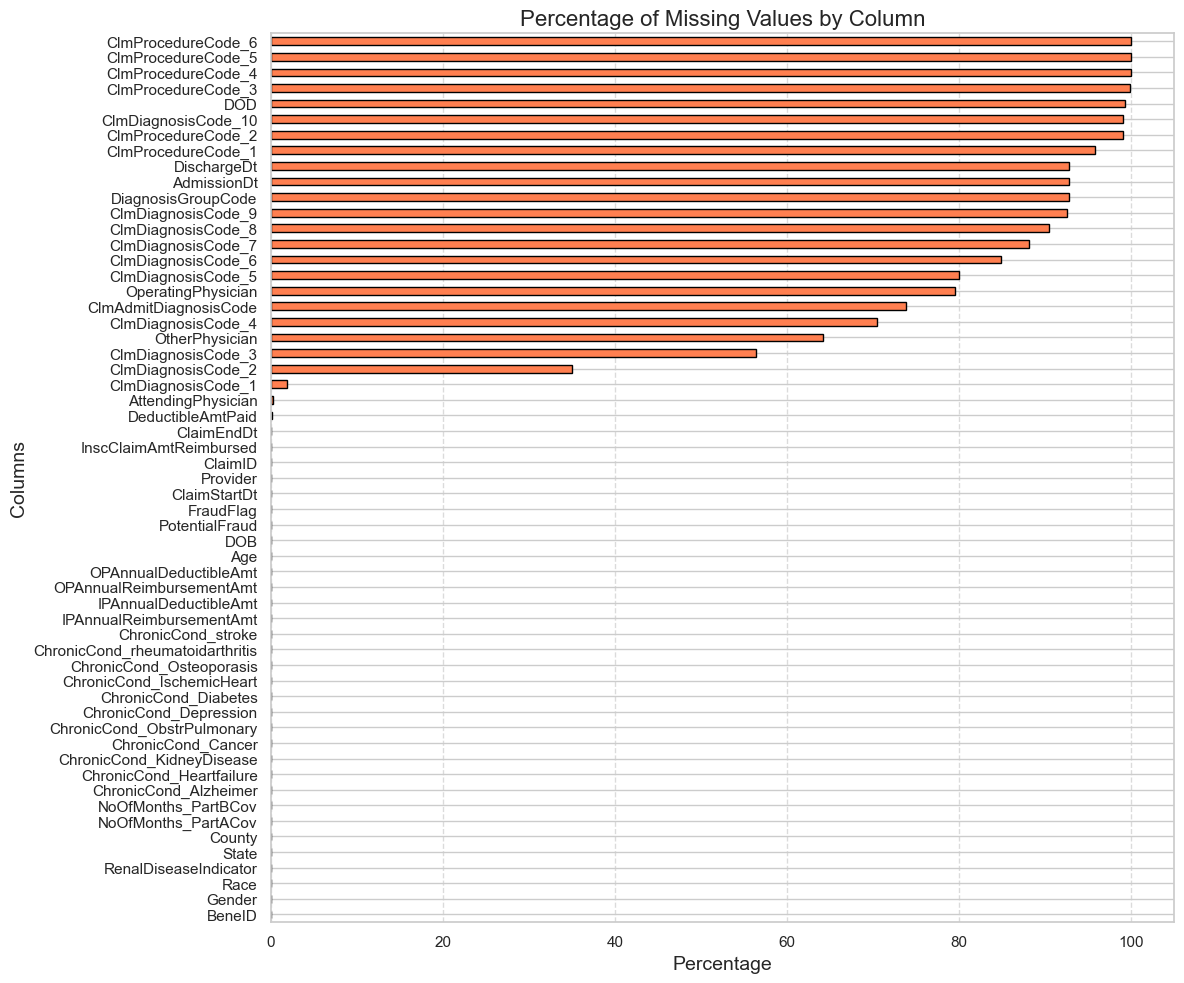

In [81]:
missing_values_percentage = all_data.isna().sum() / len(all_data) * 100

plt.figure(figsize=(12, 10))
missing_values_percentage.sort_values(ascending=True).plot(kind='barh', color='coral', edgecolor='black')
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Columns', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [82]:
all_data['DOB'] = pd.to_datetime(all_data['DOB'])
all_data['DOD'] = pd.to_datetime(all_data['DOD'])

all_data['Age'] = all_data['DOD'].dt.year - all_data['DOB'].dt.year
all_data.drop(columns=['DOB'], inplace=True)


In [83]:
print(all_data['Age'].value_counts())


Age
67.0    209
69.0    189
73.0    170
77.0    163
68.0    161
       ... 
51.0      6
36.0      5
39.0      4
95.0      3
42.0      2
Name: count, Length: 63, dtype: int64


In [84]:
stats = all_data['Age'].describe()
stats

count    4131.000000
mean       74.509078
std        11.094448
min        36.000000
25%        68.000000
50%        75.000000
75%        82.000000
max       100.000000
Name: Age, dtype: float64

In [85]:
# mean i 50% są bardzo podobne


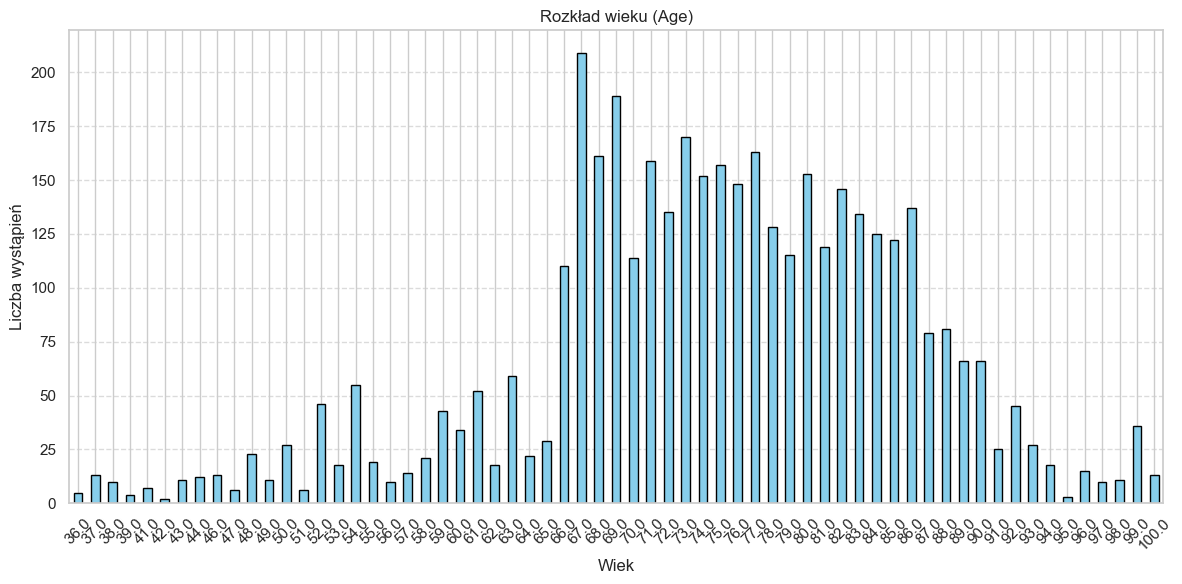

In [86]:
import matplotlib.pyplot as plt

age_counts = all_data['Age'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
age_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Rozkład wieku (Age)')
plt.xlabel('Wiek')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [87]:
all_data['Age'].fillna(all_data['Age'].median(), inplace=True)


C:\Users\daria\AppData\Local\Temp\ipykernel_9928\1656550493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data['Age'].fillna(all_data['Age'].median(), inplace=True)


In [88]:
all_data.head()

BeneID   ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12 2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31 2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17 2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14 2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13 2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN               331.0                 NaN   
4                 NaN              3893.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6 DOD  Gender  Race RenalDiseaseIndicator  State  County  \
0                 NaN NaT       1     1                     0     39     230   
1                 NaN NaT       1     1                     0     39     230   
2                 NaN NaT       1     1                     0     39     230   
3                 NaN NaT       2     2                     0      1     360   
4                 NaN NaT       2     1                     Y     45     780   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                   12                   12                      1   
1                   12                   12                      1   
2                   12   

In [89]:
print(all_data['PotentialFraud'].isnull().sum())

0


In [90]:
all_data['isAlive'] = all_data['DOD'].isna().astype(int)
all_data.head()

BeneID   ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12 2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31 2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17 2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14 2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13 2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN               331.0                 NaN   
4                 NaN              3893.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6 DOD  Gender  Race RenalDiseaseIndicator  State  County  \
0                 NaN NaT       1     1                     0     39     230   
1                 NaN NaT       1     1                     0     39     230   
2                 NaN NaT       1     1                     0     39     230   
3                 NaN NaT       2     2                     0      1     360   
4                 NaN NaT       2     1                     Y     45     780   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                   12                   12                      1   
1                   12                   12                      1   
2                   12   

In [91]:
 #Czy występuje niezrównoważenie klas (np. dużo więcej 0 niż 1)?

print(all_data['PotentialFraud'].value_counts())
print(all_data['PotentialFraud'].value_counts(normalize=True) * 100)


PotentialFraud
No     345415
Yes    212796
Name: count, dtype: int64
PotentialFraud
No     61.878931
Yes    38.121069
Name: proportion, dtype: float64


Over/Undesampling wyrównanie klasy - to zalezy przemyślec na podstawie liczby row - przy dużej undersampling, jak mala liczba danych oversampling

In [92]:
# Tak jest więcej nie oszust ok 61% a 38 % jest oszustw

#  Czy kolumna istnieje i ma odpowiedni typ (binary, Yes/No, 0/1)?
#  Czy występuje niezrównoważenie klas (np. dużo więcej 0 niż 1)?
#  Czy klasy są poprawnie zakodowane?

# Tak mamy w provider data dwie kolumny 0/1

In [93]:
#Czy są zduplikowane wiersze (df.duplicated().sum())?

all_data.duplicated().sum()

#Nie ma

0

In [94]:
#Czy są zduplikowane identyfikatory (Provider, ClaimID itd.)?
print('Zduplikowane ClaimID:', all_data['ClaimID'].duplicated().sum())
print('Zduplikowane BeneID:', all_data['BeneID'].duplicated().sum())
print('Zduplikowane Provider:', all_data['Provider'].duplicated().sum())


Zduplikowane ClaimID: 0
Zduplikowane BeneID: 419655
Zduplikowane Provider: 552801


BeneID i Provider się powtarzają. Sprawdzmy ile przeciętnie claimów jest per clienta, a ile jest per clienta frauda.

In [95]:
avg_claims_per_client = all_data.groupby('BeneID')['ClaimID'].nunique().mean()
print(f"Średnia liczba zgłoszeń na klienta: {avg_claims_per_client:.2f}")

# Średnio mamy 4 claimy.

Średnia liczba zgłoszeń na klienta: 4.03


In [96]:

fraud_providers = all_data[all_data['PotentialFraud'] == 'Yes']['Provider'].unique()
fraud_clients = all_data[all_data['Provider'].isin(fraud_providers)]

avg_claims_per_fraud_client = fraud_clients.groupby('BeneID')['ClaimID'].nunique().mean()
print(f"Średnia liczba zgłoszeń na klienta z fraudowym providerem: {avg_claims_per_fraud_client:.2f}")


Średnia liczba zgłoszeń na klienta z fraudowym providerem: 2.53


In [97]:
# Średnia liczba zgłoszen na klienta jest 2.53, czyli raczej ten który nie korzysta intensywnie 

In [98]:
# A co z żyjący i nie żyjący 


C:\Users\daria\AppData\Local\Temp\ipykernel_9928\693213522.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_claims_alive_status.index, y=avg_claims_alive_status.values, palette='pastel')


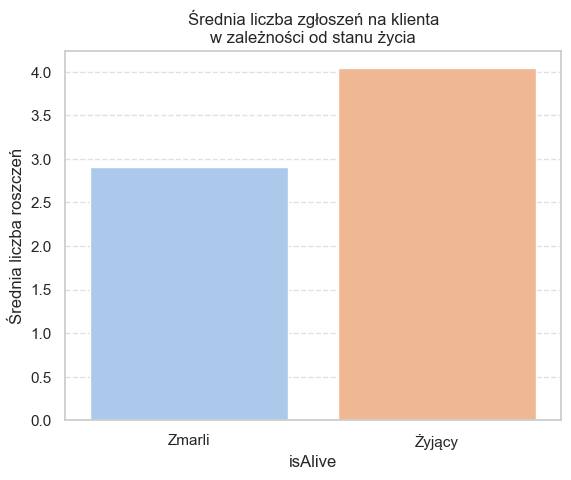

In [99]:
claims_per_client = all_data.groupby(['BeneID', 'isAlive'])['ClaimID'].nunique().reset_index()
avg_claims_alive_status = claims_per_client.groupby('isAlive')['ClaimID'].mean()

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=avg_claims_alive_status.index, y=avg_claims_alive_status.values, palette='pastel')
plt.xticks([0, 1], ['Zmarli', 'Żyjący'])
plt.ylabel('Średnia liczba roszczeń')
plt.title('Średnia liczba zgłoszeń na klienta\nw zależności od stanu życia')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [100]:
# Więcej fraudów chociaz niewiele więcej jest na żyjących

WasOperated
0    443764
1    114447
Name: count, dtype: int64
WasOperated
0    79.5
1    20.5
Name: proportion, dtype: float64


C:\Users\daria\AppData\Local\Temp\ipykernel_9928\4143646158.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WasOperated', data=all_data, palette='Set2')


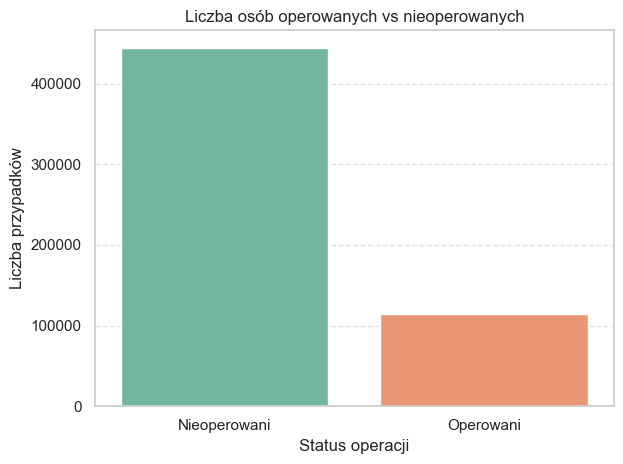

In [101]:
all_data['WasOperated'] = all_data['OperatingPhysician'].notna().astype(int)
operated_counts = all_data['WasOperated'].value_counts()
operated_percent = all_data['WasOperated'].value_counts(normalize=True) * 100
print(operated_counts)
print(operated_percent.round(2))

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='WasOperated', data=all_data, palette='Set2')
plt.xticks([0, 1], ['Nieoperowani', 'Operowani'])
plt.title('Liczba osób operowanych vs nieoperowanych')
plt.ylabel('Liczba przypadków')
plt.xlabel('Status operacji')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [102]:
# Widać wyrażna tendencje że nie operowani raczej jest fraud
# A wrod operowanych to jakie operacje byly sfingwane

In [103]:
fraud_operated = all_data[
    (all_data['WasOperated'] == 1) & 
    (all_data['FraudFlag'] == 1)
]

fraud_by_diag = fraud_operated.groupby('DiagnosisGroupCode')['ClaimID'].count().sort_values(ascending=False)
print(fraud_by_diag.head(10))


DiagnosisGroupCode
286    59
864    55
316    53
252    52
862    51
242    50
244    48
248    48
303    47
307    47
Name: ClaimID, dtype: int64


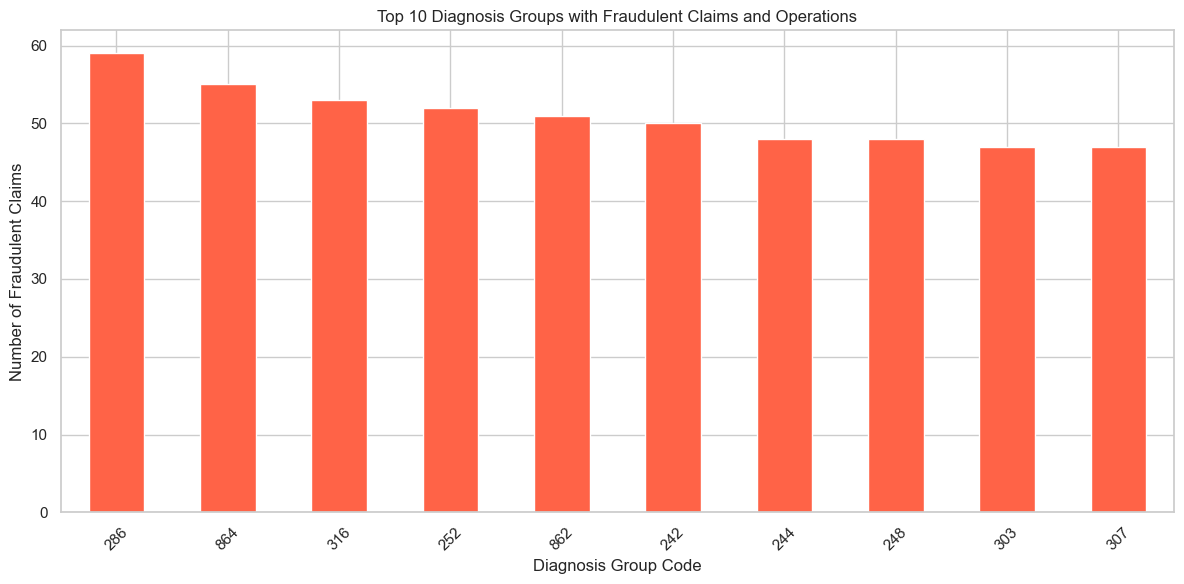

In [104]:
fraud_by_diag.head(10).plot(kind='bar', figsize=(12,6), color='tomato')
plt.title('Top 10 Diagnosis Groups with Fraudulent Claims and Operations')
plt.ylabel('Number of Fraudulent Claims')
plt.xlabel('Diagnosis Group Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [105]:
print(all_data.columns.tolist())

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'Chron

In [106]:
fraud_with_diag = all_data[
    (all_data['FraudFlag'] == 1) &
    (all_data['DiagnosisGroupCode'].notna())
]

count_fraud_with_diag = fraud_with_diag.shape[0]
print(f"Liczba fraudów z wypełnionym DiagnosisGroupCode: {count_fraud_with_diag}")


Liczba fraudów z wypełnionym DiagnosisGroupCode: 23402


In [107]:
fraud_with_diag = all_data[
    (all_data['FraudFlag'] == 1) &
    (all_data['DiagnosisGroupCode'].notna())
]

all_claims_with_diag = all_data[
    (all_data['DiagnosisGroupCode'].notna())
]
count_fraud_with_diag = fraud_with_diag.shape[0]
total_fraud = all_claims_with_diag.shape[0]

percentage = (count_fraud_with_diag / total_fraud) * 100

print(f"Procent fraudów z wypełnionym DiagnosisGroupCode: {percentage:.2f}%")


Procent fraudów z wypełnionym DiagnosisGroupCode: 57.82%


In [108]:
# Ponad połowe ma wypelnione 57.82%

In [109]:
# A jak od racy fraud zalezy 

Race
1    37.862287
2    36.455787
3    45.457773
5    44.035533
Name: FraudFlag, dtype: float64


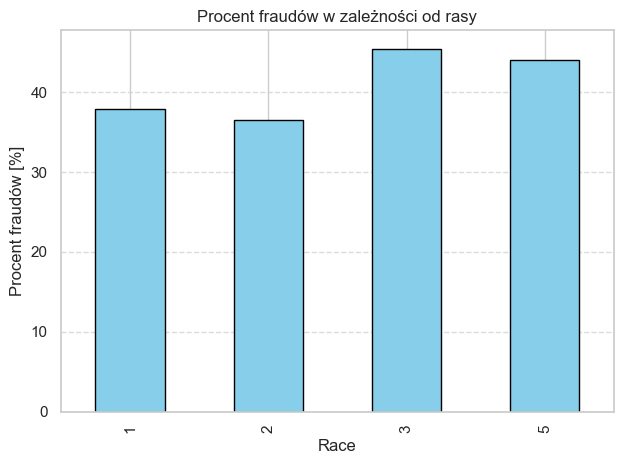

In [110]:
fraud_by_race = all_data.groupby('Race')['FraudFlag'].mean() * 100
print(fraud_by_race)

fraud_by_race.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Procent fraudów w zależności od rasy')
plt.xlabel('Race')
plt.ylabel('Procent fraudów [%]')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Najwięcej jest fraudów w rasie 3 i 5
Nie ma wsród fraudow Azjatyckich danych a najwięcej jest fraudow z Hispanic

<Axes: xlabel='Race'>

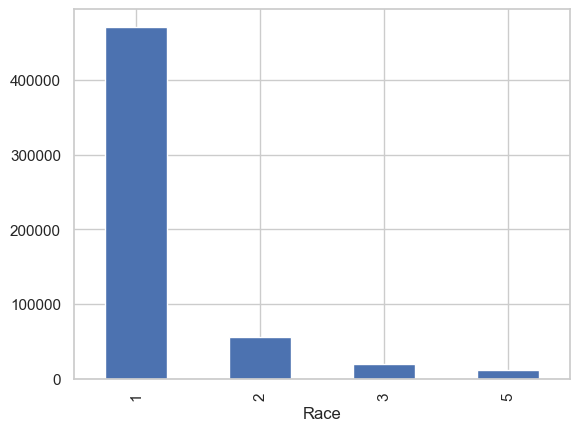

In [111]:
all_data['Race'].value_counts().plot(kind='bar')

In [112]:
fraud_counts_gender = all_data[all_data['FraudFlag'] == 1].groupby('Gender').size()
print(fraud_counts_gender)

Gender
1     89683
2    123113
dtype: int64


C:\Users\daria\AppData\Local\Temp\ipykernel_9928\1572156481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts_gender.index, y=fraud_counts_gender.values, palette='pastel')


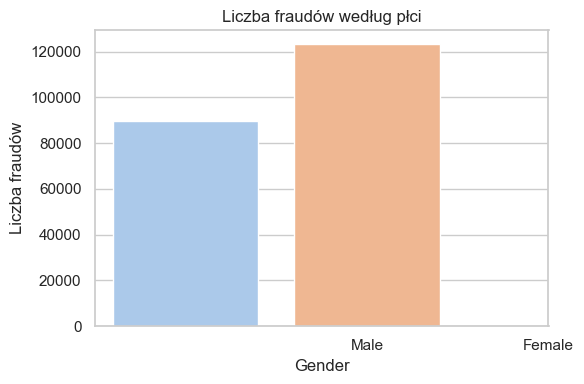

In [113]:
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts_gender.index, y=fraud_counts_gender.values, palette='pastel')
plt.title('Liczba fraudów według płci')
plt.xlabel('Gender')
plt.ylabel('Liczba fraudów')
plt.xticks(ticks=fraud_counts_gender.index, labels=['Male', 'Female']) 
plt.tight_layout()
plt.show()

In [114]:
fraud_ratio_gender = all_data.groupby('Gender')['FraudFlag'].mean() * 100
fraud_ratio_gender

Gender
1    38.147233
2    38.102032
Name: FraudFlag, dtype: float64

Jest więcej fraudow na mezczyznach ilosciowo ale procentowo jest wyrownanie

In [115]:
# Ile per dekada jest fraudow

C:\Users\daria\AppData\Local\Temp\ipykernel_9928\70683036.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_ratio.index, y=fraud_ratio.values, palette='viridis')


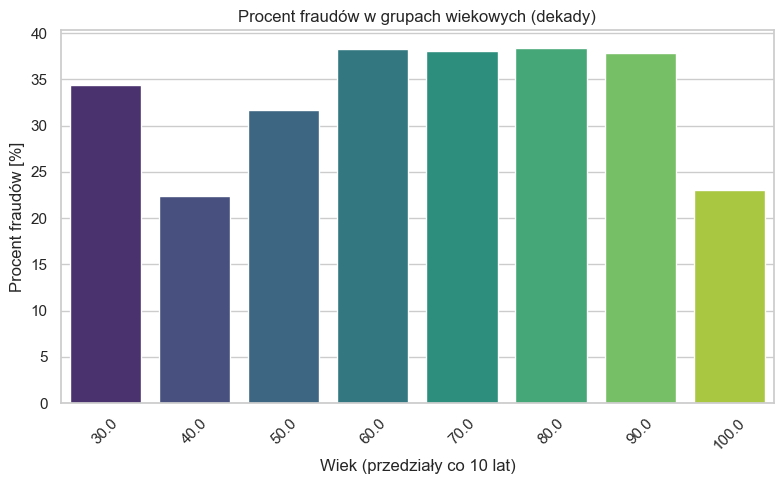

In [116]:
all_data['AgeGroup'] = (all_data['Age'] // 10) * 10

fraud_by_agegroup = all_data[all_data['FraudFlag'] == 1].groupby('AgeGroup').size()
total_by_agegroup = all_data.groupby('AgeGroup').size()
fraud_ratio = (fraud_by_agegroup / total_by_agegroup) * 100

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=fraud_ratio.index, y=fraud_ratio.values, palette='viridis')
plt.title('Procent fraudów w grupach wiekowych (dekady)')
plt.xlabel('Wiek (przedziały co 10 lat)')
plt.ylabel('Procent fraudów [%]')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [117]:
# Najmniej jest fraudow la 40 latkow i 100 latków 

In [118]:
all_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabe

In [119]:
alzheimers = all_data[all_data['ChronicCond_Alzheimer'] == 1]
fraud_ratio_alzheimers = alzheimers['FraudFlag'].mean() * 100
print(f'Procent fraudów wśród chorych na Alzheimera: {fraud_ratio_alzheimers:.2f}%')


Procent fraudów wśród chorych na Alzheimera: 38.49%


In [120]:
chronic_conditions = [
    'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
    'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
    'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
    'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
    'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
    'ChronicCond_stroke'
]

fraud_percentages = {}

for cond in chronic_conditions:
    subset = all_data[all_data[cond] == 1]
    fraud_percent = subset[subset['FraudFlag'] == 1].shape[0] / all_data[all_data['FraudFlag'] == 1].shape[0] * 100
    fraud_percentages[cond] = fraud_percent

fraud_percent_df = pd.DataFrame.from_dict(fraud_percentages, orient='index', columns=['Fraud %']).sort_values(by='Fraud %', ascending=False)
print(fraud_percent_df)

#ile jest fraudow per choroba przewlekla na wszystkie fraudy

                                   Fraud %
ChronicCond_IschemicHeart        76.369857
ChronicCond_Diabetes             70.849546
ChronicCond_Heartfailure         59.609203
ChronicCond_Depression           43.510216
ChronicCond_KidneyDisease        42.222128
ChronicCond_Alzheimer            40.577360
ChronicCond_ObstrPulmonary       32.006241
ChronicCond_Osteoporasis         31.834715
ChronicCond_rheumatoidarthritis  31.411775
ChronicCond_Cancer               15.309498
ChronicCond_stroke               10.524634


Najczęsciej oszukują na chronic 
ChronicCond_IschemicHeart        76.369857
ChronicCond_Diabetes             70.849546
ChronicCond_Heartfailure         59.609203
ChronicCond_Depression           43.510216

In [121]:
all_data.columns


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabe

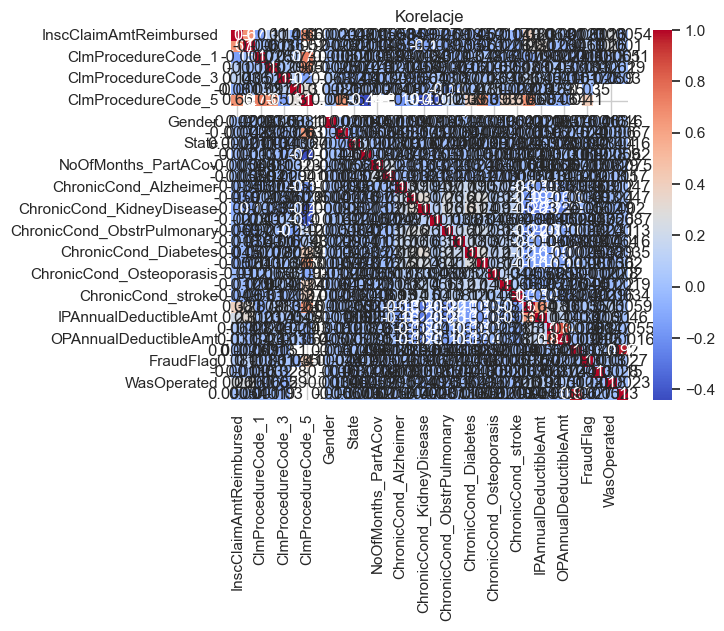

In [122]:
corr_df = all_data.copy()

correlation = corr_df.select_dtypes(include=['number']).corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelacje')
plt.show()


In [123]:
all_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabe

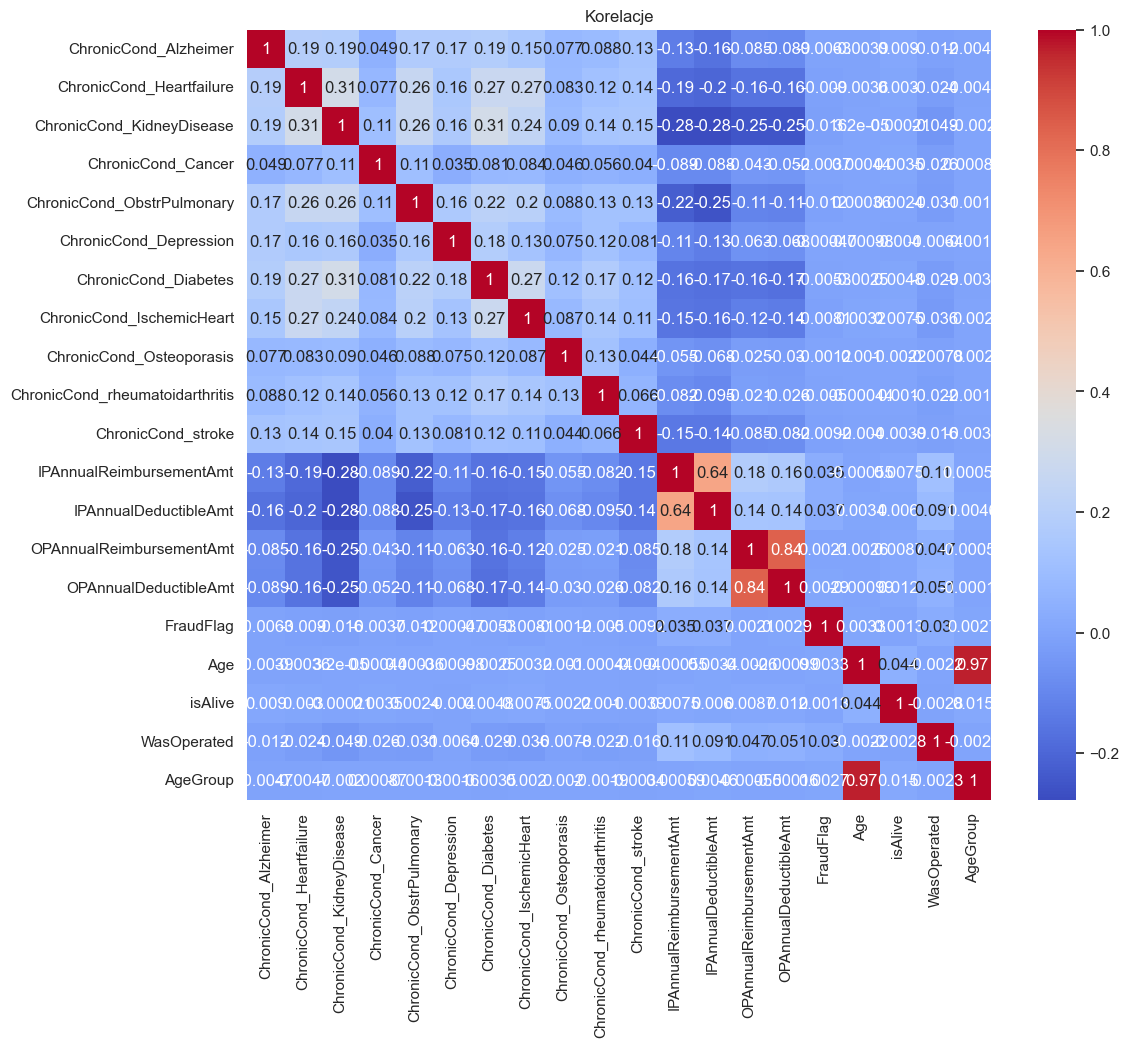

In [124]:
cols = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
        'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
        'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
        'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
        'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
        'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
        'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
        'OPAnnualDeductibleAmt', 'PotentialFraud', 'FraudFlag', 'Age',
        'isAlive', 'WasOperated', 'AgeGroup']

corr_df = all_data[cols]

correlation = corr_df.select_dtypes(include=['number']).corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelacje')
plt.show()

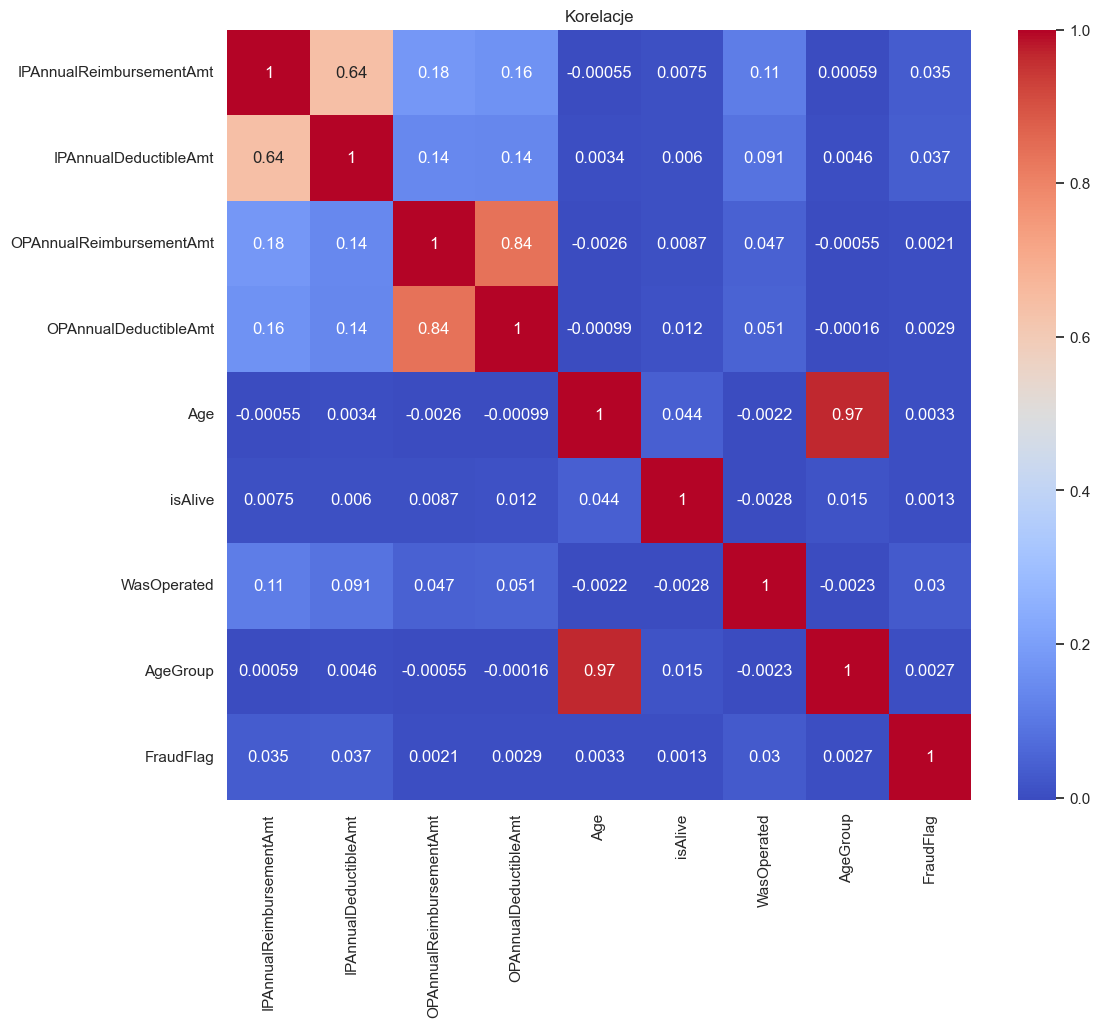

In [125]:
cols = [ 'IPAnnualReimbursementAmt',
        'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
        'OPAnnualDeductibleAmt', 'PotentialFraud', 'Age',
        'isAlive', 'WasOperated', 'AgeGroup', 'FraudFlag']

corr_df = all_data[cols]

correlation = corr_df.select_dtypes(include=['number']).corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelacje')
plt.show()

In [126]:
all_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabe

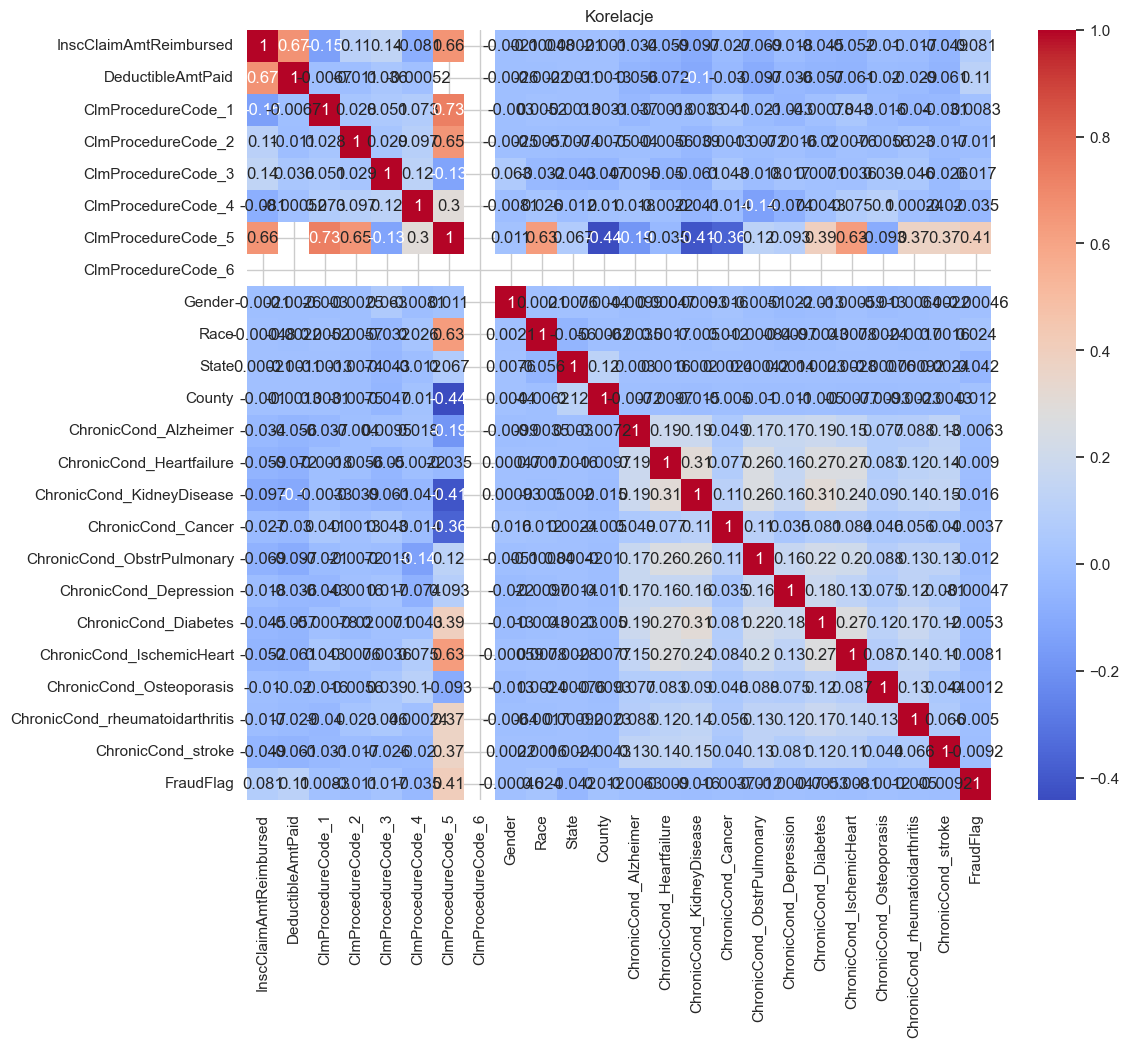

In [127]:
cols = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke','FraudFlag']

corr_df2 = all_data[cols]

correlation = corr_df2.select_dtypes(include=['number']).corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelacje')
plt.show()

In [128]:
# widaź wyrazna zależnoc CLM_procedure_5

In [129]:
fraud_counts_nonnull = all_data[(all_data['FraudFlag'] == 1) & (all_data['ClmProcedureCode_5'].notna())]['ClmProcedureCode_5'].value_counts()
print(fraud_counts_nonnull)


ClmProcedureCode_5
4139.0    2
5185.0    1
9971.0    1
2724.0    1
9982.0    1
Name: count, dtype: int64


In [130]:
total_counts = all_data['ClmProcedureCode_5'].value_counts(dropna=False)
fraud_counts = all_data[all_data['FraudFlag'] == 1]['ClmProcedureCode_5'].value_counts(dropna=False)

fraud_percent = (fraud_counts / total_counts) * 100
fraud_percent = fraud_percent.sort_values(ascending=False)

print(fraud_percent)


ClmProcedureCode_5
5185.0    100.000000
9971.0    100.000000
9982.0    100.000000
4139.0     66.666667
2724.0     50.000000
NaN        38.120609
4422.0           NaN
Name: count, dtype: float64


In [131]:
all_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabe

In [132]:
#all_data = all_data.drop(['ClaimStartDt', 'ClaimEndDt','PotentialFraud', 'AgeGroup', 'DOD', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov','OPAnnualDeductibleAmt', 'IPAnnualDeductibleAmt'],axis=1)
all_data = all_data.drop(['ClaimStartDt', 'ClaimEndDt'],axis=1)


In [133]:
all_data.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DOD',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHea

In [134]:
all_data = all_data.drop(['DeductibleAmtPaid'],axis=1)

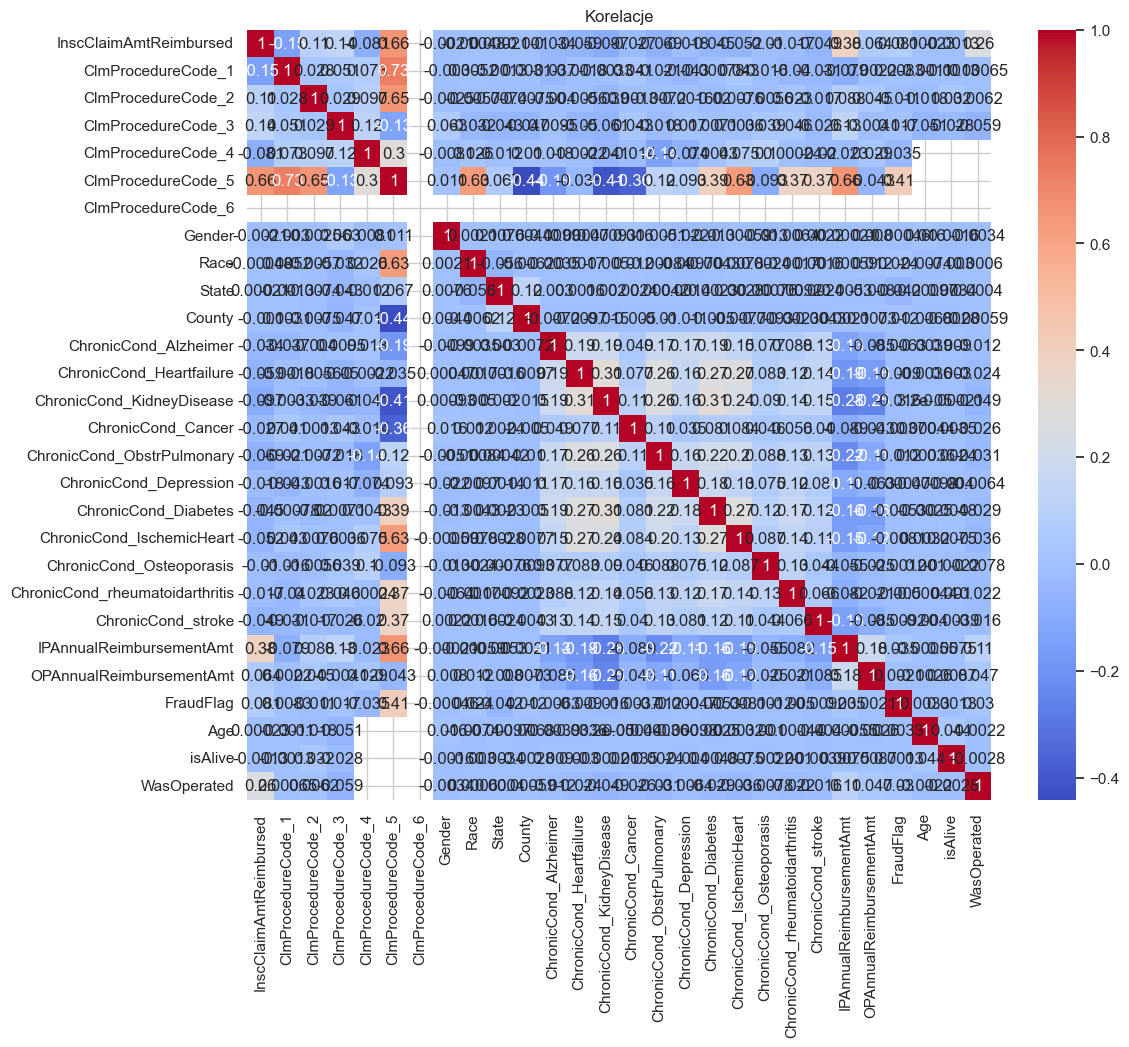

In [135]:
cols = ['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'OPAnnualReimbursementAmt', 'FraudFlag', 'Age', 'isAlive',
       'WasOperated']

corr_df3 = all_data[cols]

correlation = corr_df3.select_dtypes(include=['number']).corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelacje')
plt.show()

In [136]:
# Melt: przekształcenie danych z szerokiego formatu do długiego
all_data_melted = all_data.melt(var_name='original_column', value_name='value')
# Dodanie nowej kolumny z ostatnią literą nazwy kolumny
all_data_melted['last_letter'] = all_data_melted['original_column'].str[-1]



In [137]:
print(all_data_melted.head())

  original_column      value last_letter
0          BeneID  BENE11001           D
1          BeneID  BENE11001           D
2          BeneID  BENE11001           D
3          BeneID  BENE11011           D
4          BeneID  BENE11014           D


In [138]:



# Wybierz kolumny, których nazwa kończy się cyfrą 1-9
digit_cols = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']
# Stwórz pustą kolumnę docelową
all_data['digit_found'] = None
# Iteruj po wybranych kolumnach i przypisz cyfrę tam, gdzie wartość == 1
for col in digit_cols:
    digit = col[-1]
    mask = all_data[col] == 1
    all_data.loc[mask, 'digit_found'] = digit
display(all_data.head())

BeneID   ClaimID  Provider  InscClaimAmtReimbursed AttendingPhysician  \
0  BENE11001  CLM46614  PRV55912                   26000          PHY390922   
1  BENE11001  CLM66048  PRV55907                    5000          PHY318495   
2  BENE11001  CLM68358  PRV56046                    5000          PHY372395   
3  BENE11011  CLM38412  PRV52405                    5000          PHY369659   
4  BENE11014  CLM63689  PRV56614                   10000          PHY379376   

  OperatingPhysician OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  \
0                NaN            NaN  2009-04-12                  7866   
1          PHY318495            NaN  2009-08-31                  6186   
2                NaN      PHY324689  2009-09-17                 29590   
3          PHY392961      PHY349768  2009-02-14                   431   
4          PHY398258            NaN  2009-08-13                 78321   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN               331.0                 NaN   
4                 NaN              3893.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6 DOD  Gender  Race RenalDiseaseIndicator  State  County  \
0                 NaN NaT       1     1                     0     39     230   
1                 NaN NaT       1     1                     0     39     230   
2                 NaN NaT       1     1                     0     39     230   
3                 NaN NaT       2     2                     0      1     360   
4                 NaN NaT       2     1                     Y     45     780   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                   12                   12                      1   
1                   12                   12                      1   
2                   12                   12                      1   
3                   12                   12                      2   
4                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                        

In [139]:
display(all_data.head())

BeneID   ClaimID  Provider  InscClaimAmtReimbursed AttendingPhysician  \
0  BENE11001  CLM46614  PRV55912                   26000          PHY390922   
1  BENE11001  CLM66048  PRV55907                    5000          PHY318495   
2  BENE11001  CLM68358  PRV56046                    5000          PHY372395   
3  BENE11011  CLM38412  PRV52405                    5000          PHY369659   
4  BENE11014  CLM63689  PRV56614                   10000          PHY379376   

  OperatingPhysician OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  \
0                NaN            NaN  2009-04-12                  7866   
1          PHY318495            NaN  2009-08-31                  6186   
2                NaN      PHY324689  2009-09-17                 29590   
3          PHY392961      PHY349768  2009-02-14                   431   
4          PHY398258            NaN  2009-08-13                 78321   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN               331.0                 NaN   
4                 NaN              3893.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6 DOD  Gender  Race RenalDiseaseIndicator  State  County  \
0                 NaN NaT       1     1                     0     39     230   
1                 NaN NaT       1     1                     0     39     230   
2                 NaN NaT       1     1                     0     39     230   
3                 NaN NaT       2     2                     0      1     360   
4                 NaN NaT       2     1                     Y     45     780   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                   12                   12                      1   
1                   12                   12                      1   
2                   12                   12                      1   
3                   12                   12                      2   
4                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                        

Analiza ze względu na rasę beneficjenta

In [140]:
fraud_percentage_df = all_data.groupby('Race')['FraudFlag'].mean().reset_index()
fraud_percentage_df['FraudFlag'] = fraud_percentage_df['FraudFlag'] * 100
fraud_percentage_df.rename(columns={'FraudFlag': 'Fraud Percentage'}, inplace=True)

print(fraud_percentage_df)


   Race  Fraud Percentage
0     1         37.862287
1     2         36.455787
2     3         45.457773
3     5         44.035533


In [141]:
fraud_percentage_df = all_data.groupby(['Race', 'AgeGroup']).agg(
    FraudFlag_mean=('FraudFlag', 'mean'),
    count=('FraudFlag', 'size')  # liczba wierszy w grupie
).reset_index()
fraud_percentage_df['FraudFlag_mean'] = fraud_percentage_df['FraudFlag_mean'] * 100
fraud_percentage_df.rename(columns={'FraudFlag_mean': 'Fraud Percentage'}, inplace=True)

print(fraud_percentage_df)

    Race  AgeGroup  Fraud Percentage   count
0      1      30.0         38.095238      21
1      1      40.0         25.925926      54
2      1      50.0         29.268293     205
3      1      60.0         40.486409     699
4      1      70.0         37.862903  468823
5      1      80.0         38.680203     985
6      1      90.0         36.440678     236
7      1     100.0         23.076923      13
8      2      30.0         27.272727      11
9      2      40.0         17.857143      28
10     2      50.0         35.483871      31
11     2      60.0         31.683168     101
12     2      70.0         36.480555   55361
13     2      80.0         32.352941     102
14     2      90.0         66.666667       6
15     3      50.0         75.000000       4
16     3      60.0         29.824561      57
17     3      70.0         45.503212   19614
18     3      80.0         41.935484      31
19     3      90.0         44.444444       9
20     5      40.0          0.000000       3
21     5  

# Rasa nie ma znaczącego wpływu na oszustwa

In [142]:
cols = [
    'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
    'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
    'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
    'ClmDiagnosisCode_10'
]

# Tworzymy nową kolumnę 'DiagnosisCount' zliczającą ile jest wartości nie-NaN w tych kolumnach
all_data['DiagnosisCount'] = all_data[cols].notnull().sum(axis=1)

# Sprawdź efekt
print(all_data[['DiagnosisCount']].head())

   DiagnosisCount
0               9
1               3
2               6
3               9
4               9


In [143]:
cols = [
    'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
    'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
]

# Tworzymy nową kolumnę 'ProceduresCount' zliczającą ile jest wartości nie-NaN w tych kolumnach
all_data['ProceduresCount'] = all_data[cols].notnull().sum(axis=1)

# Sprawdź efekt
print(all_data[['ProceduresCount']].head())

   ProceduresCount
0                0
1                1
2                0
3                1
4                1


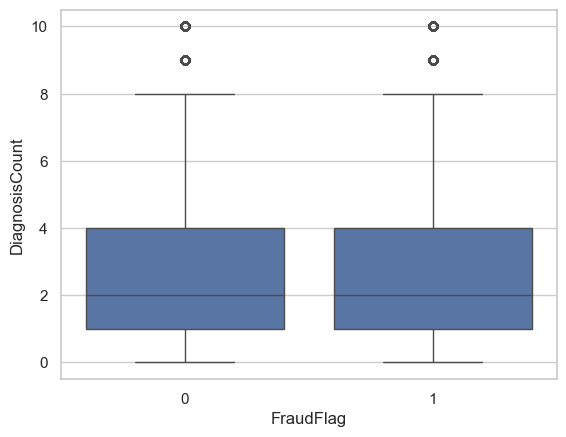

Korelacja Pearsona między DiagnosisCount a FraudFlag: 0.06552380768356797


In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='FraudFlag', y='DiagnosisCount', data=all_data)
plt.show()

correlation = all_data['DiagnosisCount'].corr(all_data['FraudFlag'])
print(f"Korelacja Pearsona między DiagnosisCount a FraudFlag: {correlation}")

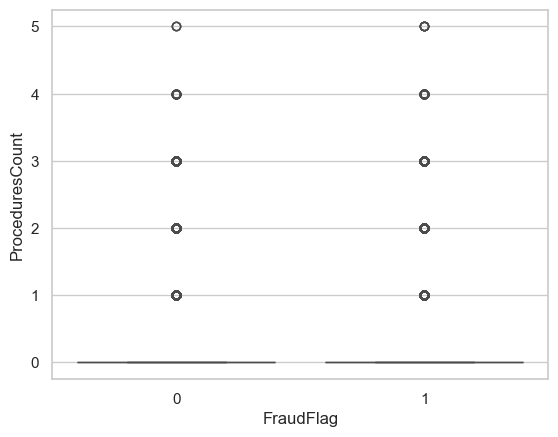

Korelacja Pearsona między ProceduresCount a FraudFlag: 0.07912935793651985


In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='FraudFlag', y='ProceduresCount', data=all_data)
plt.show()

correlation = all_data['ProceduresCount'].corr(all_data['FraudFlag'])
print(f"Korelacja Pearsona między ProceduresCount a FraudFlag: {correlation}")

C:\Users\daria\AppData\Local\Temp\ipykernel_9928\443993491.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='DiagCount', y='FraudPercent', palette='Reds')


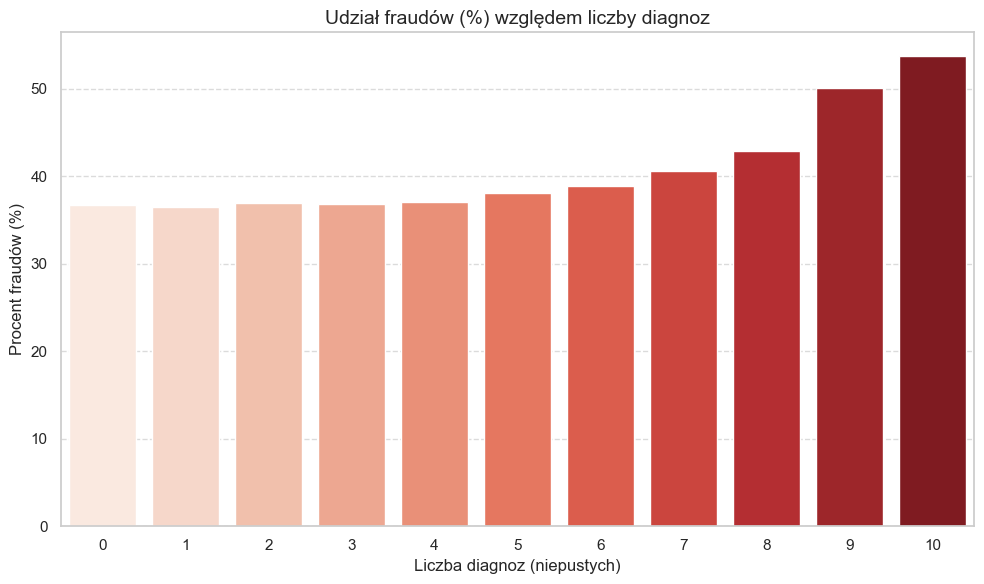

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
diag_cols = [f'ClmDiagnosisCode_{i}' for i in range(1, 11)]
all_data['DiagCount'] = all_data[diag_cols].notna().sum(axis=1)
all_data['FraudFlag'] = pd.to_numeric(all_data['FraudFlag'], errors='coerce')
summary = all_data.groupby('DiagCount')['FraudFlag'].agg(['sum', 'count']).reset_index()
summary['FraudPercent'] = (summary['sum'] / summary['count']) * 100
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='DiagCount', y='FraudPercent', palette='Reds')
plt.title('Udział fraudów (%) względem liczby diagnoz', fontsize=14)
plt.xlabel('Liczba diagnoz (niepustych)', fontsize=12)
plt.ylabel('Procent fraudów (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\daria\AppData\Local\Temp\ipykernel_9928\4131702207.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


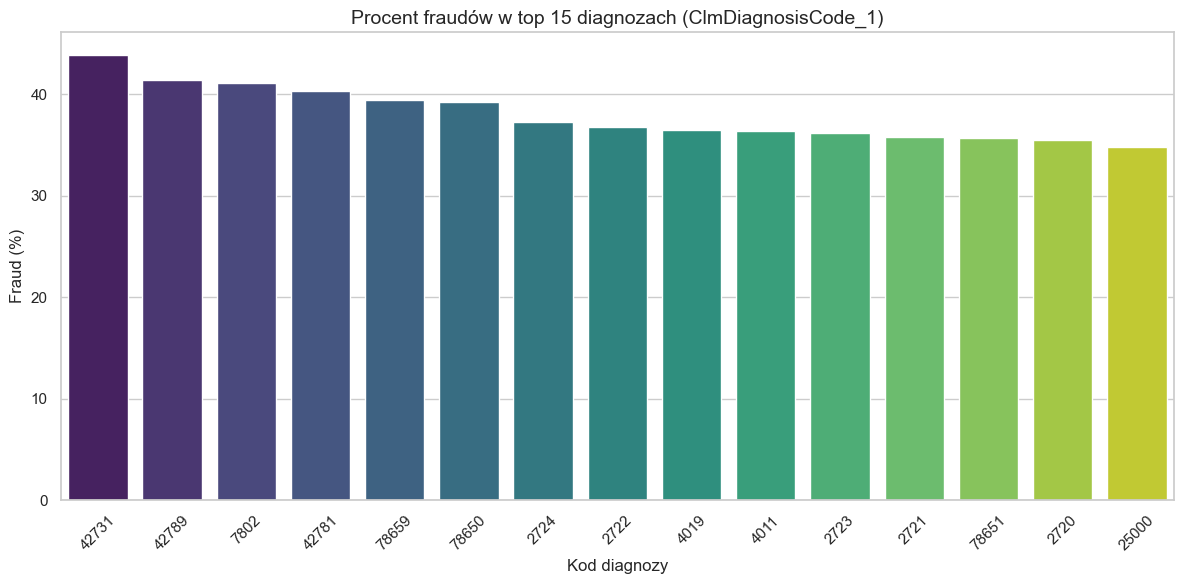

In [147]:
top_15 = (
    all_data['ClmDiagnosisCode_1']
    .value_counts()
    .head(15)
    .index
)
df_top15 = all_data[all_data['ClmDiagnosisCode_1'].isin(top_15)]
diag_summary = (
    df_top15
    .groupby('ClmDiagnosisCode_1')['FraudFlag']
    .agg(
        total='count',
        fraud_count='sum'
    )
    .reset_index()
)
diag_summary['fraud_percent'] = (diag_summary['fraud_count'] / diag_summary['total']) * 100
diag_summary = diag_summary.sort_values(by='fraud_percent', ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(
    data=diag_summary,
    x='ClmDiagnosisCode_1',
    y='fraud_percent',
    palette='viridis'
)
plt.title('Procent fraudów w top 15 diagnozach (ClmDiagnosisCode_1)', fontsize=14)
plt.xlabel('Kod diagnozy', fontsize=12)
plt.ylabel('Fraud (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\daria\AppData\Local\Temp\ipykernel_9928\1194254740.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


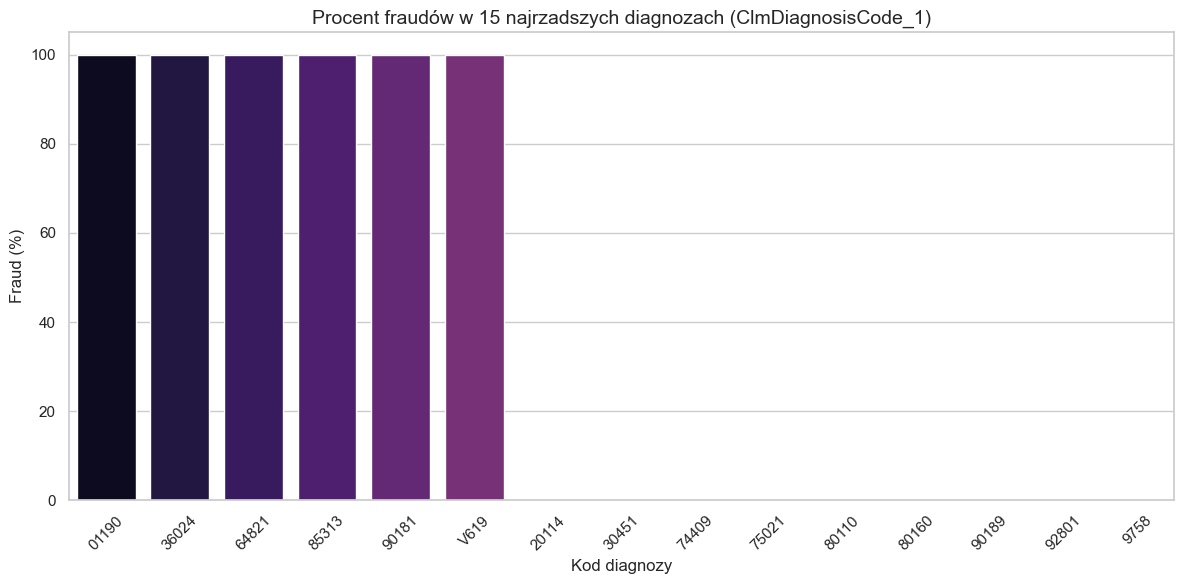

In [148]:
# Znajdź 15 najrzadszych diagnoz (pomijając NaN)
rare_15 = (
    all_data['ClmDiagnosisCode_1']
    .value_counts(ascending=True)
    .dropna()
    .head(15)
    .index
)
# Filtrowanie danych tylko do tych diagnoz
df_rare15 = all_data[all_data['ClmDiagnosisCode_1'].isin(rare_15)]
# Podsumowanie fraudów i liczby przypadków
rare_diag_summary = (
    df_rare15
    .groupby('ClmDiagnosisCode_1')['FraudFlag']
    .agg(
        total='count',
        fraud_count='sum'
    )
    .reset_index()
)
rare_diag_summary['fraud_percent'] = (rare_diag_summary['fraud_count'] / rare_diag_summary['total']) * 100
rare_diag_summary = rare_diag_summary.sort_values(by='fraud_percent', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=rare_diag_summary,
    x='ClmDiagnosisCode_1',
    y='fraud_percent',
    palette='magma'
)
plt.title('Procent fraudów w 15 najrzadszych diagnozach (ClmDiagnosisCode_1)', fontsize=14)
plt.xlabel('Kod diagnozy', fontsize=12)
plt.ylabel('Fraud (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\daria\AppData\Local\Temp\ipykernel_9928\3369919961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


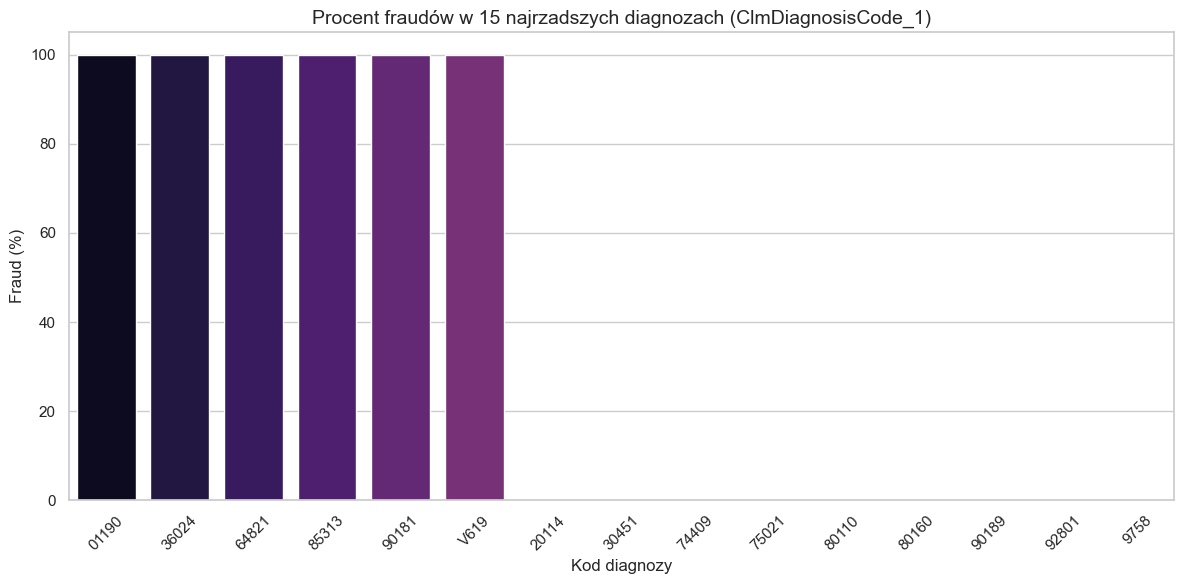

In [149]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=rare_diag_summary,
    x='ClmDiagnosisCode_1',
    y='fraud_percent',
    palette='magma'
)
plt.title('Procent fraudów w 15 najrzadszych diagnozach (ClmDiagnosisCode_1)', fontsize=14)
plt.xlabel('Kod diagnozy', fontsize=12)
plt.ylabel('Fraud (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\daria\AppData\Local\Temp\ipykernel_9928\1570904107.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


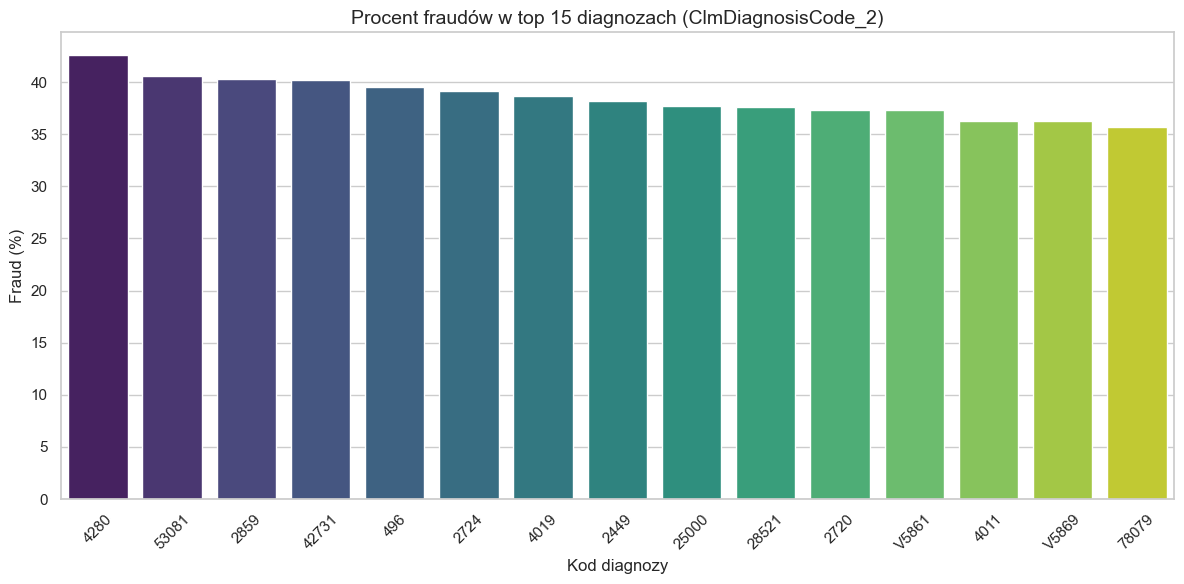

In [150]:
top_15_2= (
    all_data['ClmDiagnosisCode_2']
    .value_counts()
    .head(15)
    .index
)
df_top15 = all_data[all_data['ClmDiagnosisCode_2'].isin(top_15_2)]
diag_summary = (
    df_top15
    .groupby('ClmDiagnosisCode_2')['FraudFlag']
    .agg(
        total='count',
        fraud_count='sum'
    )
    .reset_index()
)
diag_summary['fraud_percent'] = (diag_summary['fraud_count'] / diag_summary['total']) * 100
diag_summary = diag_summary.sort_values(by='fraud_percent', ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(
    data=diag_summary,
    x='ClmDiagnosisCode_2',
    y='fraud_percent',
    palette='viridis'
)
plt.title('Procent fraudów w top 15 diagnozach (ClmDiagnosisCode_2)', fontsize=14)
plt.xlabel('Kod diagnozy', fontsize=12)
plt.ylabel('Fraud (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [151]:
#Analiza fraudów według lekarzy (AttendingPhysician, OperatingPhysician, OtherPhysician)
# Top 10 lekarzy z największą liczbą fraudów
top_phys_frauds = all_data[all_data['PotentialFraud'] == 'Yes'] \
    ['AttendingPhysician'].value_counts().head(10)
print(top_phys_frauds)
top_phys_ids = top_phys_frauds.index.tolist()
top_phys_data = all_data[all_data['AttendingPhysician'].isin(top_phys_ids)]

AttendingPhysician
PHY330576    2534
PHY350277    1628
PHY412132    1321
PHY423534    1223
PHY314027    1200
PHY327046    1181
PHY338032    1158
PHY357120    1156
PHY337425    1156
PHY341578    1133
Name: count, dtype: int64


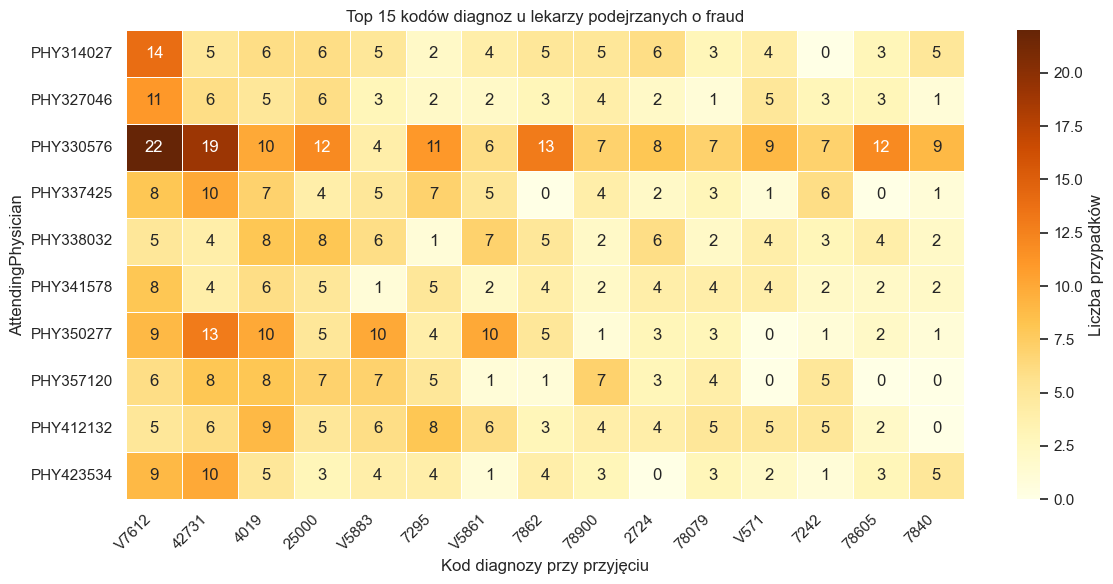

In [152]:
fraud_phys_data = all_data[
    (all_data['PotentialFraud'] == 'Yes') &
    (all_data['AttendingPhysician'].isin(top_phys_ids))
]
fraud_diag_crosstab = pd.crosstab(fraud_phys_data['AttendingPhysician'], fraud_phys_data['ClmAdmitDiagnosisCode'])

# Wyciągnij top 15 najczęstszych kodów diagnozy wśród tych lekarzy
top_diag_codes = fraud_phys_data['ClmAdmitDiagnosisCode'].value_counts().head(15).index
# Filtrowanie tabeli tylko do tych kodów
filtered_crosstab = fraud_diag_crosstab[top_diag_codes]

plt.figure(figsize=(12, 6))
sns.heatmap(filtered_crosstab, cmap='YlOrBr', annot=True, fmt='d', linewidths=0.5, cbar_kws={'label': 'Liczba przypadków'})
plt.title("Top 15 kodów diagnoz u lekarzy podejrzanych o fraud")
plt.xlabel("Kod diagnozy przy przyjęciu")
plt.ylabel("AttendingPhysician")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [153]:
print('########################')

########################


In [154]:
##### przygotowanie

all_data["RenalDiseaseIndicator2"] = all_data["RenalDiseaseIndicator"].map({
    "Y": 1,
    "N": 0,
    "0": np.nan
})

kolumny = [
    'InscClaimAmtReimbursed',
    'NoOfMonths_PartACov',
    'NoOfMonths_PartBCov',
    'IPAnnualReimbursementAmt',
    'IPAnnualDeductibleAmt',
    'OPAnnualReimbursementAmt',
    'OPAnnualDeductibleAmt',
    'Age',
    'DiagnosisCount',
    'ProceduresCount',
    'WasOperated',
    'Gender',
    'Race',
    'RenalDiseaseIndicator2'
]

X = all_data[kolumny]
y = all_data['FraudFlag']

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

##### skalowanie
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#####  treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.2, random_state=42
)


scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
print('done')

done


In [159]:
import gc ######### wywalony model ==>czyszczenie modelu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score

results = []
print('Start trenowania modeli...')

nm = 0
for maxd in range(1, 30):
    for lr in np.arange(0.01, 1, 0.05):  
        nm += 1
        print(f"\n➡️ Model {nm} | Parametry: max_depth = {maxd}, learning_rate = {lr:.2f}")
        
        model = XGBClassifier(
            objective='binary:logistic',
            eval_metric='logloss',
            scale_pos_weight=scale_pos_weight,
            random_state=42,
            max_depth=maxd,
            learning_rate=lr,
            tree_method='hist' 
        )
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred, digits=4)

        print(f"📊 F1 Score = {f1:.4f}, ROC AUC = {auc:.4f}")
        print(f"🧾 Confusion Matrix:\n{cm}")
        print(f"🧾 Classification Report:\n{cr}")

        results.append({
            'model_nr': nm,
            'max_depth': maxd,
            'learning_rate': lr,
            'f1': f1,
            'roc_auc': auc,
            'conf_matrix': cm,
            'class_report': cr,
            'model': model
        })

        del model   ####==>czyszczenie modelu
        gc.collect()

### the best model
results_df = pd.DataFrame(results)
best_row = results_df.sort_values(by='roc_auc', ascending=False).iloc[0]
best_model = best_row['model']


print('Koniec trenowania')



Start trenowania modeli...

➡️ Model 1 | Parametry: max_depth = 1, learning_rate = 0.01
📊 F1 Score = 0.1887, ROC AUC = 0.5274
🧾 Confusion Matrix:
[[64912  4171]
 [37693  4867]]
🧾 Classification Report:
              precision    recall  f1-score   support

           0     0.6326    0.9396    0.7562     69083
           1     0.5385    0.1144    0.1887     42560

    accuracy                         0.6250    111643
   macro avg     0.5856    0.5270    0.4724    111643
weighted avg     0.5968    0.6250    0.5398    111643


➡️ Model 2 | Parametry: max_depth = 1, learning_rate = 0.06
📊 F1 Score = 0.2722, ROC AUC = 0.5369
🧾 Confusion Matrix:
[[60872  8211]
 [34562  7998]]
🧾 Classification Report:
              precision    recall  f1-score   support

           0     0.6378    0.8811    0.7400     69083
           1     0.4934    0.1879    0.2722     42560

    accuracy                         0.6169    111643
   macro avg     0.5656    0.5345    0.5061    111643
weighted avg     0.5828 

In [160]:
results_df = pd.DataFrame(results)
best_row = results_df.sort_values(by='roc_auc', ascending=False).iloc[0]
best_model = best_row['model']

In [161]:
##########    wybranie optymalnego modelu
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]
conf_best = confusion_matrix(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best, digits=4)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_prob_best)

print("\n====== ✅ NAJLEPSZY MODEL ======")
print(f"🔢 Model nr: {best_row['model_nr']}")
print(f"🛠 Max Depth: {best_row['max_depth']}")
print(f"⚙️ Learning Rate: {best_row['learning_rate']:.2f}")
print(f"🏅 ROC AUC: {roc_auc_best:.4f}")
print(f"🏅 F1 Score: {f1_best:.4f}")
print("\n🧾 Confusion Matrix:\n", conf_best)
print("\n🧾 Classification Report:\n", report_best)

#### wynik minialnie wyższy niz losowy


====== ✅ NAJLEPSZY MODEL ======
🔢 Model nr: 563
🛠 Max Depth: 29
⚙️ Learning Rate: 0.11
🏅 ROC AUC: 0.6580
🏅 F1 Score: 0.5152

🧾 Confusion Matrix:
 [[49104 19979]
 [20860 21700]]

🧾 Classification Report:
               precision    recall  f1-score   support

           0     0.7018    0.7108    0.7063     69083
           1     0.5206    0.5099    0.5152     42560

    accuracy                         0.6342    111643
   macro avg     0.6112    0.6103    0.6107    111643
weighted avg     0.6328    0.6342    0.6334    111643



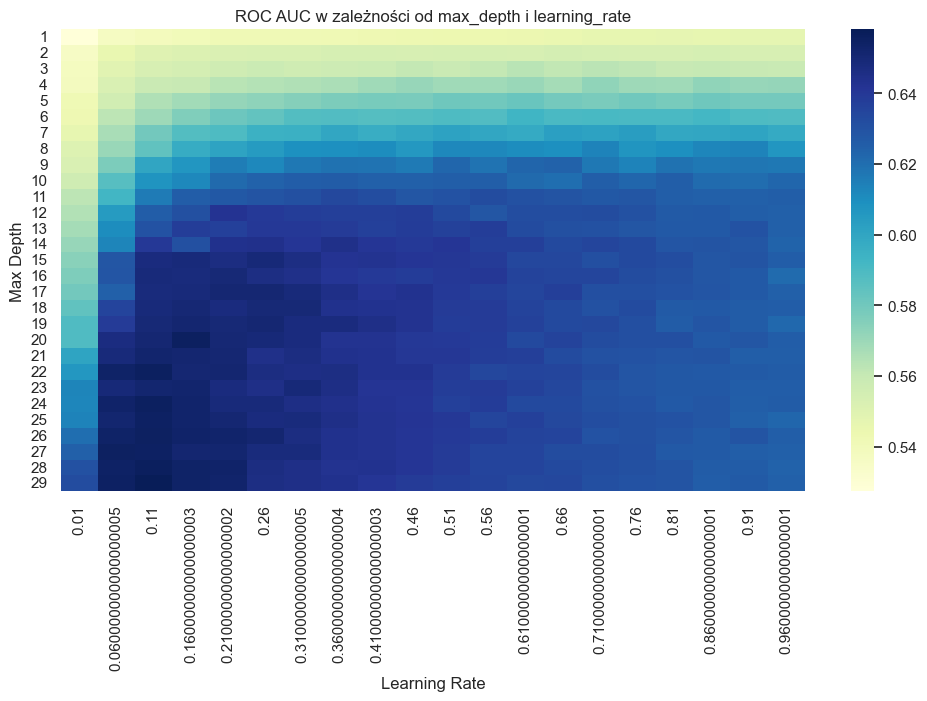

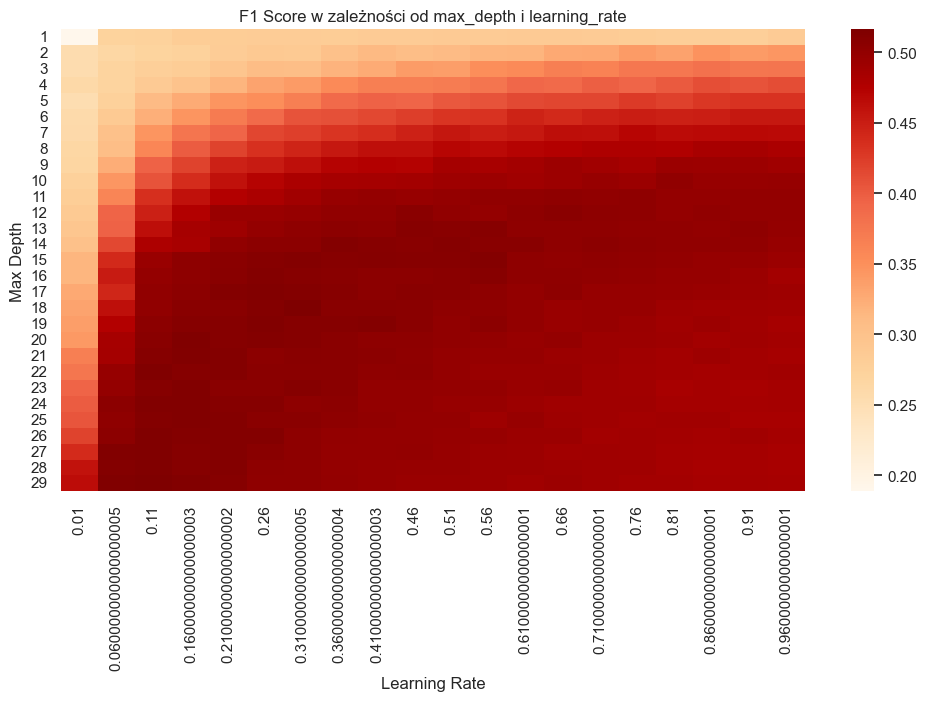

In [162]:
#########   sprawdzenie czy czy wyższe wartośći dają wyższe wyniki

plt.figure(figsize=(12, 6))
pivot_auc = results_df.pivot(index="max_depth", columns="learning_rate", values="roc_auc")
sns.heatmap(pivot_auc, annot=False, cmap="YlGnBu")
plt.title("ROC AUC w zależności od max_depth i learning_rate")
plt.xlabel("Learning Rate")
plt.ylabel("Max Depth")
plt.show()

plt.figure(figsize=(12, 6))
pivot_f1 = results_df.pivot(index="max_depth", columns="learning_rate", values="f1")
sns.heatmap(pivot_f1, annot=False, cmap="OrRd")
plt.title("F1 Score w zależności od max_depth i learning_rate")
plt.xlabel("Learning Rate")
plt.ylabel("Max Depth")
plt.show()

C:\Users\daria\AppData\Local\Temp\ipykernel_9928\4265805509.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="model_str", y="f1", palette="coolwarm")
C:\Users\daria\AppData\Local\Temp\ipykernel_9928\4265805509.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


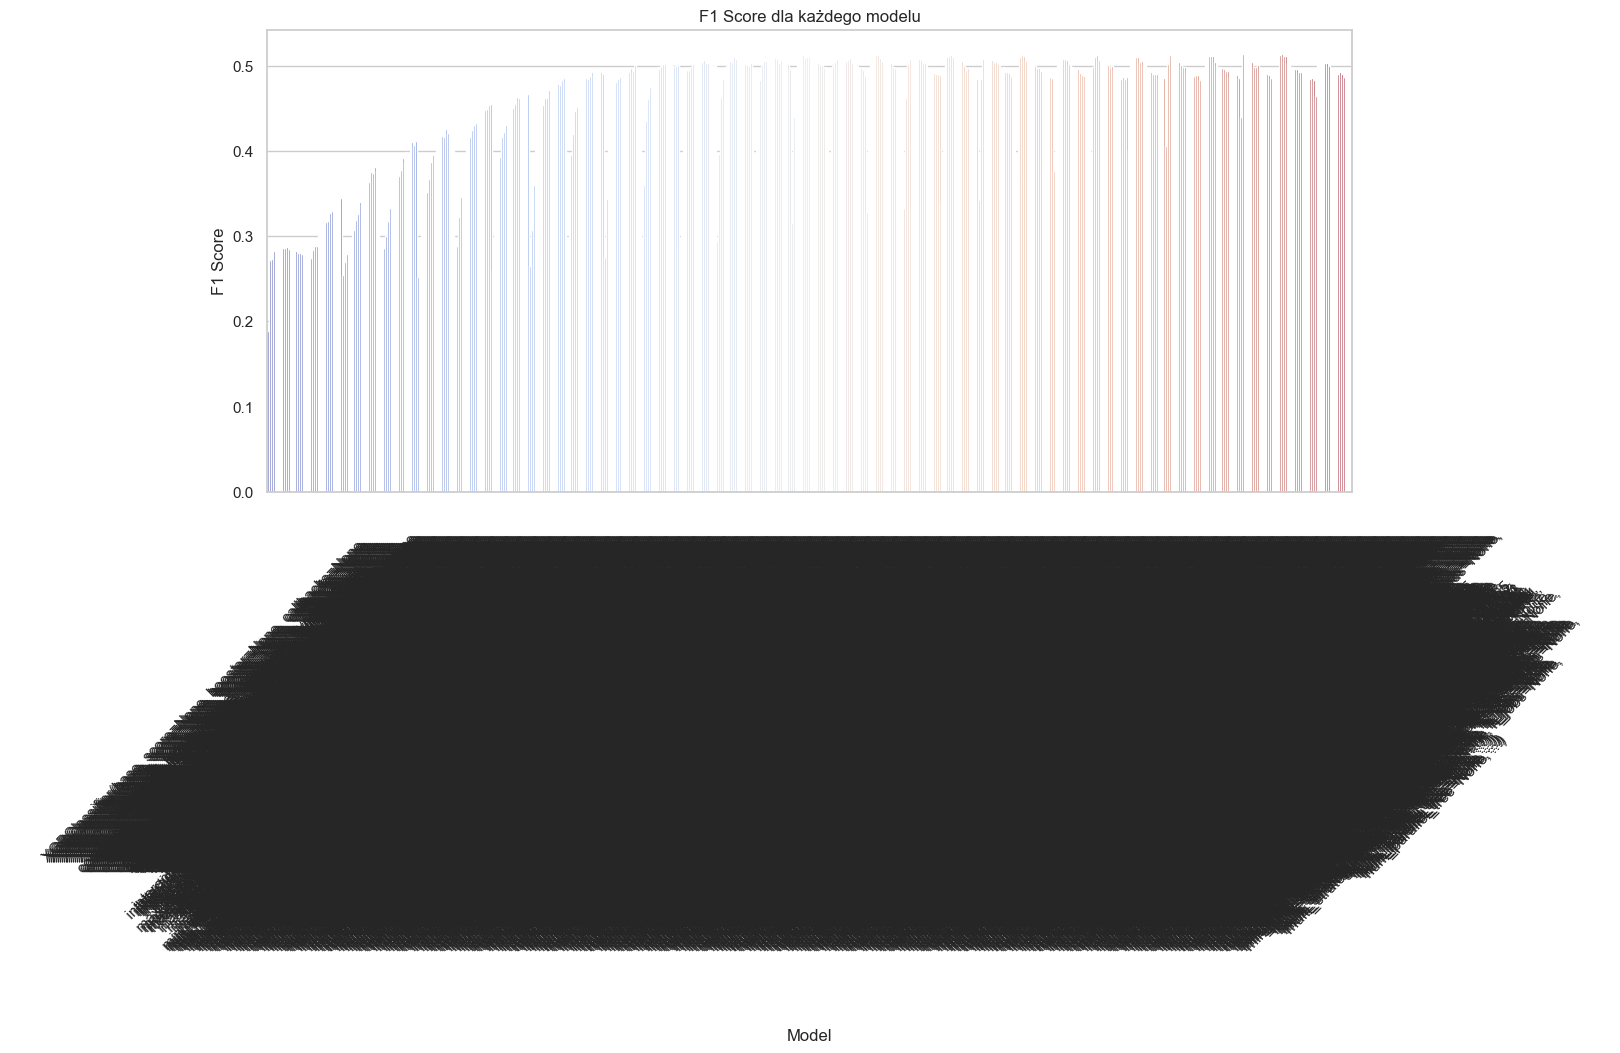

In [163]:
results_df["model_str"] = results_df["model"].astype(str)

plt.figure(figsize=(14, 6))
sns.barplot(data=results_df, x="model_str", y="f1", palette="coolwarm")
plt.title("F1 Score dla każdego modelu")
plt.xticks(rotation=45)
plt.ylabel("F1 Score")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

In [164]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [165]:
import xgboost as xgb

# Konwersja danych do DMatrix
dtrain = xgb.DMatrix(X_tr, label=y_tr)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    "objective": "binary:logistic",
    "eval_metric": ["logloss", "auc"],
    "scale_pos_weight": scale_pos_weight,
    "max_depth": 29,
    "learning_rate": 0.11,
    "tree_method": "hist",
    "seed": 42
}

evals_result = {}

# Trenowanie z obserwacją
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=[(dtrain, "train"), (dval, "val")],
    early_stopping_rounds=10,
    evals_result=evals_result,
    verbose_eval=False
)

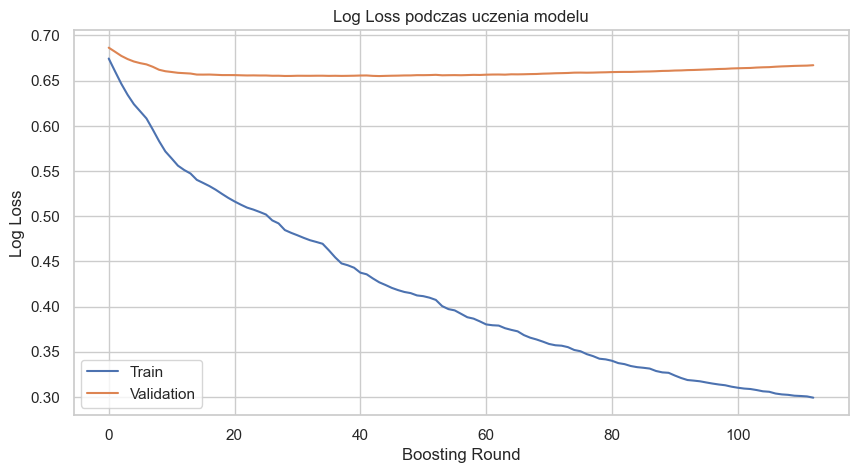

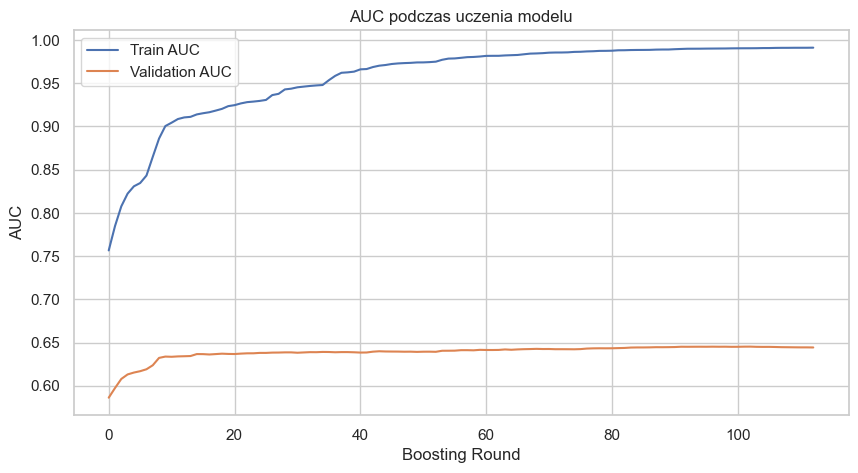

In [166]:
import matplotlib.pyplot as plt

#### wyniki wybranego modelu
#####

epochs = len(evals_result['train']['logloss'])
x_axis = range(epochs)

# Log Loss
plt.figure(figsize=(10, 5))
plt.plot(x_axis, evals_result['train']['logloss'], label='Train')
plt.plot(x_axis, evals_result['val']['logloss'], label='Validation')
plt.title("Log Loss podczas uczenia modelu")
plt.xlabel("Boosting Round")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.show()

# AUC
plt.figure(figsize=(10, 5))
plt.plot(x_axis, evals_result['train']['auc'], label='Train AUC')
plt.plot(x_axis, evals_result['val']['auc'], label='Validation AUC')
plt.title("AUC podczas uczenia modelu")
plt.xlabel("Boosting Round")
plt.ylabel("AUC")
plt.legend()
plt.grid(True)
plt.show()